In [101]:
!pip install pandas numpy matplotlib seaborn matplotlib plotly plotly_express scikit-learn plotly imbalanced-learn nbformat



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
# Import Packages
import pandas as pd # pandas import to create dataframes to store dataset from file and perform data manipulation (GeeksforGeeks, 2025a; (NumFOCUS Inc, 2025))
import numpy as np# numpy import to create multidimensional arrays and perform mathematical operations (NumPy team, 2025; Jeremiah, 2023)
import seaborn as sns # seaborn import to for data visualization and statistical graphics (Waskom, 2024)
import matplotlib.pyplot as plt# matplotlib import for data visualization and plotting (GeeksforGeeks, 2025b;Matplotlib, 2025)
import sklearn #  sklearn import provides machine learning algorithms and tools for data preprocessing (Great Learning, 2025; Scikit-Learn, 2025)
from matplotlib.ticker import MaxNLocator #(Matplotlib development team, 2025)
#matplotlib inline to display plots in the notebook
%matplotlib inline
import plotly.graph_objects as go # Plotly for interactive visualizations (Plotly, 2025)
import plotly.figure_factory as ff # Plotly for interactive visualizations (Plotly, 2025)
import plotly.express as px  # Plotly Express for interactive visualizations  (Plotly, 2025)
# import Scikit-learn packages for machine learning tasks
from sklearn.model_selection import train_test_split # (scikit-learn developers, 2025d)
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer,classification_report # (scikit-learn developers, 2025c)
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score ,cross_validate, cross_val_predict # Import libraries  for model evaluation (scikit-learn developers, 2025d)
from sklearn.preprocessing import StandardScaler, LabelEncoder #((scikit-learn developers, 2025e) 
from sklearn.pipeline import Pipeline #(scikit-learn developers, 2025b)	
from sklearn.feature_selection import SelectKBest, mutual_info_classif #(scikit-learn developers, 2025a)
import numpy as np # (NumPy team, 2025)
import joblib #(Joblib developers, 2021)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay # (scikit-learn developers, 2025c)
from scipy.stats import chi2_contingency # (The SciPy community, 2025)

### **Data Collection**

In [103]:
# Loading data from CSV file with pandas to create a dataframe
dfCan = pd.read_csv('input/Cancer_DS.csv')
# Displaying the first 5 rows of the dataframe to understand the data structure and contents
dfCan.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [153]:
#Print the Shape of the DataFrame (rows and columns)
# The shape will serve as a reference for the number of records and features in the dataset to validate data is being tranformed as intended 
# and no rows are being lost is lost 
print("Shape of the DataFrame or Dataset(DS): ", dfCan.shape)# 


Shape of the DataFrame or Dataset(DS):  (1500, 9)


The dataset contains 1500 samples/ features and 9 features (1500, 9).\
This give us a starting point and benchmark to refer back to as we go about tranforming the dataset.


### **Data Cleaning**

In [154]:
# print the datatypes of the DataFrame to understand the data types of each column
# The datatypes will also help to identify if any data type conversions are needed for analysis and machine learning tasks
dfCan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


#### **The dataset has 8 columns or features, made up of ints and floats.**
**5 of the columns are int datatypes suitable as input for machine learning algorithms**

<table border="1">
  <tr>
    <th>Feature</th>
    <th>Data Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Age</td>  
    <td>Integer value</td>  
    <td>Represents an individuals age, ranging from 20 to 80.</td>         
  <tr>
    <td>Gender</td>
     <td>Integer value</td>  
    <td>Binary values representing gender, where 0 indicates Male and 1 indicates Female.</td>
  </tr>
  <tr>
    <td>Smoking</td>
    <td>Integer value</td>  
    <td>Binary values indicating smoking status, where 0 means No and 1 means Yes.</td>
  </tr>
   <tr>
    <td>GeneticRisk</td>
    <td>Integer value</td> 
    <td> Ordinal values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.</td> 
  </tr>
   <tr>
   <td>Diagnosis</td>
   <td>Integer value</td>
   <td>Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.</td>  
  </tr>    
</table>


**3 of the columns are floats datatypes suitable as input for machine learning algorithms**

|Feature|Data Type| Description
|-----------|-----------|-----------|
|BMI|Float value|Continuous values, represents an individuals body mass index. Ranging from 15 to 40.|
|PhysicalActivity|Float value| Continuous values, represents the number of hours per day an individual was physical active. Ranging from 0 to 10.|
| AlcoholIntake|Float value|Continuous values, represents the number of alcohol units an individual consumed per week. Ranging from 0 to 5.|

##### *Handle Missing and Null Values*

In [155]:
print("Num of null values in DataFrame dfCan")
# pandas isnull() method to check for null values in the DataFrame
# The null values will help to identify any missing data that may need to be addressed before analysis and machine learning tasks
dfCan.isnull().sum()

Num of null values in DataFrame dfCan


Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [107]:
# remove columns with null values, last column of dataframe
# The last column is removed as it contains null values 
dfCan = dfCan.dropna(axis=1)
nullValues = dfCan.isnull().sum()
print("Num of null values in DS after removing null columns:", nullValues.sum())

Num of null values in DS after removing null columns: 0


In [108]:
# Display the first 5 rows of the DataFrame after removing null values
dfCan.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


##### *Handle Duplicates*

In [109]:
# pandas duplicated() method to check for duplicate rows in the DataFrame
# The duplicates will help to identify any redundant data that may need to be addressed before analysis and machine learning tasks
duplicates = dfCan.duplicated()
print("Num of duplicates values in DS:", duplicates.sum())


Num of duplicates values in DS: 0


In [110]:
# remove duplicates, inplace to make the modification directly to the original DataFrame
dfCan.drop_duplicates(inplace=True)
# call the duplicated() method again to check for duplicate rows have been effectively removed from the DataFrame
duplicates = dfCan.duplicated()
# print the number of duplicate rows after removing duplicates 
print("Num of duplicates values in DS after removing duplicates:", duplicates.sum())

Num of duplicates values in DS after removing duplicates: 0


In [111]:
#print the shape of the DataFrame after removing to ensure transformation is correct
dfCan.shape

(1500, 9)

In [112]:
# Count of unique values found in each column
# this further helps to gauge the data quality and identify any potential issues with the data.
# such as binnary values, categorical values containg more than two unique values, and numerical values with a large range of unique values.
unique_counts = dfCan.nunique()
print("Number of unique values within each column:")
# print the unique counts for each column to understand the data distribution and identify any potential issues with the data
print(unique_counts)

Number of unique values within each column:
Age                   61
Gender                 2
BMI                 1500
Smoking                2
GeneticRisk            3
PhysicalActivity    1500
AlcoholIntake       1500
CancerHistory          2
Diagnosis              2
dtype: int64


In [113]:
# dispay data types of the DataFrame to understand the data types of each column after encoding categorical variables
# to verify that the categorical variables have been successfully converted to numerical values
dfCan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


##### *Check Outliers*

In [114]:
#check for outliers using Quartile method
# Calculate the first and third quartiles (Q1 and Q3) for each column
continData = dfCan[['Age','BMI','PhysicalActivity','AlcoholIntake']]
# Calculate the interquartile range (IQR) for each column using check_outliers function
for col in continData.columns: #(GeeksforGeeks, 2025)
    Q1 = continData[col].quantile(0.25)
    Q3 = continData[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR #(GeeksforGeeks, 2025)
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers in the column
    outliers = continData[(continData[col] < lower_bound) | (continData[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in Age: 0
Number of outliers in BMI: 0
Number of outliers in PhysicalActivity: 0
Number of outliers in AlcoholIntake: 0


## **Univariate Analysis**

In [115]:
# print the descriptive statistics of the DataFrame to understand the distribution of numerical features
# The summary statistics will help to identify any outliers or anomalies in the data that may need to be 
# addressed before analysis and machine learning tasks
continData = dfCan[['Age','BMI','PhysicalActivity','AlcoholIntake']]
# print the descriptive statistics of the DataFrame to understand the distribution of numerical features
continData.describe()
print(continData.describe())

               Age          BMI  PhysicalActivity  AlcoholIntake
count  1500.000000  1500.000000       1500.000000    1500.000000
mean     50.320000    27.513321          4.897929       2.417987
std      17.640968     7.230012          2.866162       1.419318
min      20.000000    15.000291          0.002410       0.001215
25%      35.000000    21.483134          2.434609       1.210598
50%      51.000000    27.598494          4.834316       2.382971
75%      66.000000    33.850837          7.409896       3.585624
max      80.000000    39.958688          9.994607       4.987115


This is the first step to understanding the distribution, central tendency and the variability for each feature within the dataset (Bhandari, 2020). 
#### **Age:** 
The mean (50.32) is very close to the median (51.00), this suggests the distribution of data is approximately symmetrical. The std (17.64) is moderate relative to the mean, inferring a moderate variability within the datasets spread of age. This variability is supported by the 25th and 75th percentiles, which displays 50% of individual's age falls between 35 and 66 years old. Thus, the dataset contains a wide spread of ages, with majority of individuals middle-aged to old.
#### **BMI:** 
BMI's mean (27.51) and median (27.60) are also in close proximity. This suggests the distribution of data is approximately symmetrical. Further, on average individuals are overweight. The std (7.23) is low considering the features mean, implying low variability within the spread of dataset feature. This variability is supported by the 25th and 75th percentiles, which shows that 50% of individuals BMI falls between 21.48 and 33.85. Thus, majority of individuals in the dataset are overweight to obese.
#### **Physical Activity:** 
The mean (4.89) and median (4.83) are in close proximity. This suggests a near symmetrical distribution of data. Additional, on average individuals spend 4 hours physical active. The std (2.87) is moderate relative the features mean, indicating moderate variability in the spread of data. Furthermore, the min (0.00) and max (10.00) indicate activity ranges from inactive to highly active.  This variability is supported by the 25th and 75th percentiles, which indicates that 50% of individuals are physical active for 2.43 to 7.40 hours per day. Thus, the dataset contains wide range of physical activity, with a moderate portion of individuals sedentary to highly active.

#### **Alcohol Intake:** 
The mean (2.42) and median (2.38) are in close vicinity, on average individuals consume approx.  2.5 units of alcohol a week. This suggests a near symmetrical distribution of data. The std (1.41) is moderate relative the mean, indicating moderate variability within the spread of data. The min value is 0.00 and max 5, signalling alcohol behaviour ranges from sober to indulgent.  The 25th and 75th percentiles supporters the variability, which indicates 50% of individuals drink 1.21 to 3.59 unit of alcohol a week. Thus, majority of individuals in the dataset have a moderate alcohol Intake.

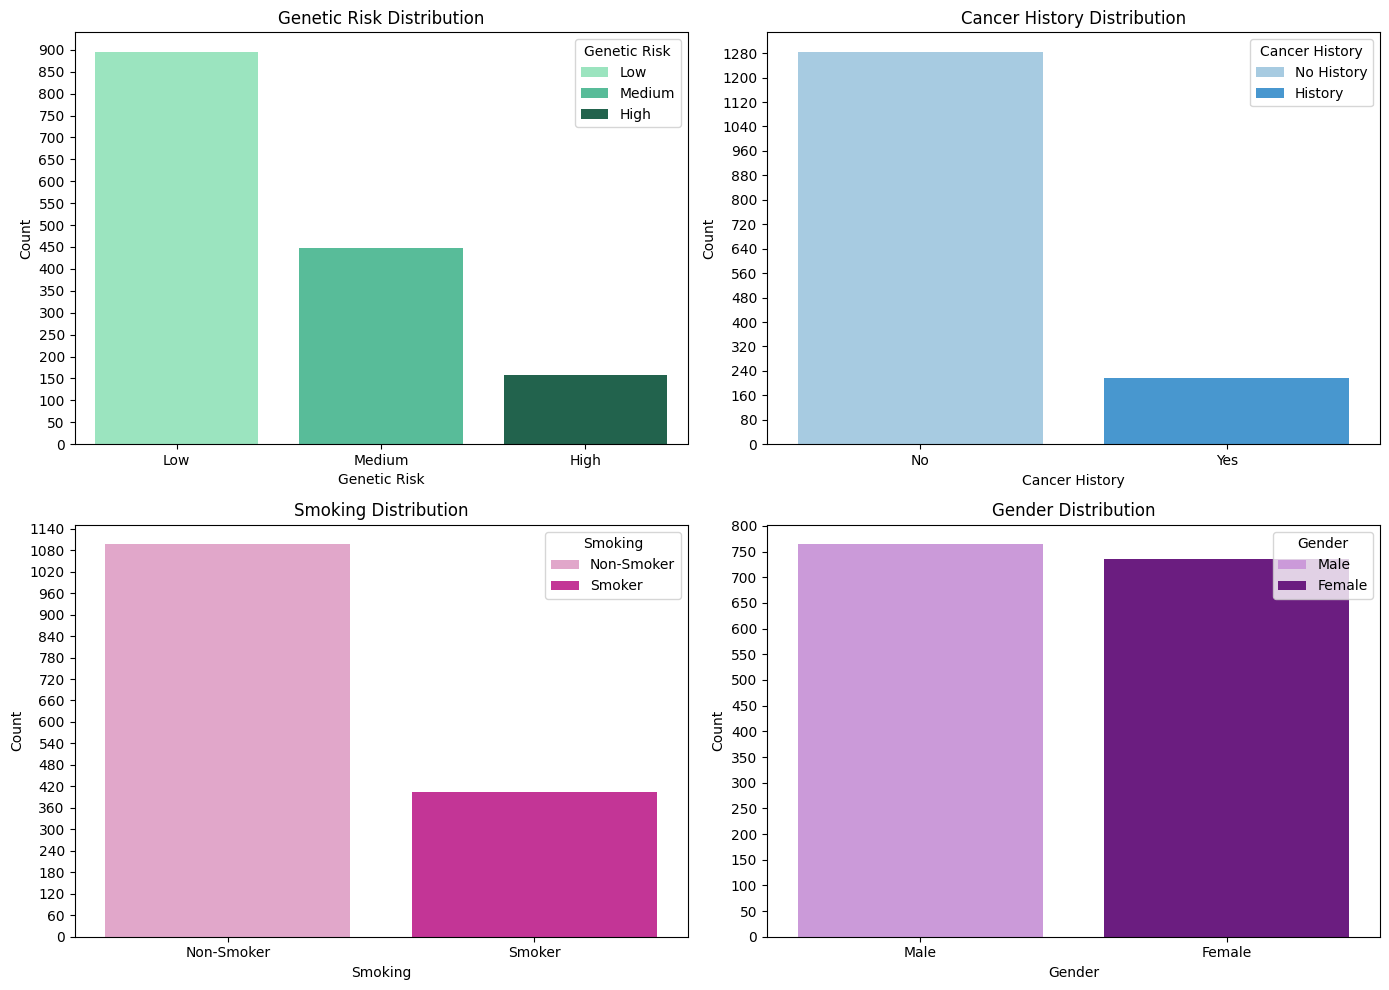

In [ ]:

# Set the overall figure size
fig, axes = plt.subplots(2, 2, figsize=(14, 10))   #(Beit, 2021)
colors_1 = ["#8FF0BF",  "#47CD9E","#176E50"] 
colors_2 = ["#9DCDEB",  "#329BE5"] 
colors_3 = ["#EB9DCC",  "#DB1D9F"] 
colors_4 = ["#D18FE4",  "#740C91"] 
# Plot 1 => GeneticRisk 
#create seaborn countplot to visualize the distribution of 'Genetic Risk' in the DataFrame
# x , set to 'Genetic Risk' 
# palette, set to 'colors_1' for color scheme
# ax, set to the first subplot in the 2x2 grid
sns.countplot(data=dfCan, x='GeneticRisk', palette=colors_1, ax=axes[0, 0], hue='GeneticRisk') #(Beit, 2021)
axes[0, 0].set_title('Genetic Risk Distribution')
axes[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[0, 0].set_xlabel('Genetic Risk')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticks([0, 1,2], ['Low','Medium','High'])
axes[0, 0].legend(title='Genetic Risk', labels=['Low','Medium','High'],loc='upper right',bbox_to_anchor=(1, 1))
# Plot 2 => Cancer History
# create seaborn countplot to visualize the distribution of 'CancerHistory' in the DataFrame
# x , set to 'CancerHistory'
# palette, set to 'colors_2' for color scheme
# ax, set to the second subplot in the 2x2 grid
sns.countplot(data=dfCan, x='CancerHistory', palette=colors_2, ax=axes[0, 1], hue='CancerHistory') #(Beit, 2021)
axes[0, 1].set_title('Cancer History Distribution')
axes[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[0, 1].set_xlabel('Cancer History')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([0, 1],['No', 'Yes'])
axes[0, 1].legend(title='Cancer History', labels=['No History', 'History'],loc='upper right',bbox_to_anchor=(1, 1))

# Plot 3 => Smoking
# create seaborn countplot to visualize the distribution of 'Smoking' in the DataFrame
# x , set to 'Smoking'
# palette, set to 'colors_3' for color scheme
# ax, set to the third subplot in the 2x2 grid
sns.countplot(data=dfCan, x='Smoking', palette=colors_3, ax=axes[1, 0] , hue='Smoking')  ##(Beit, 2021)
axes[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[1, 0].set_title('Smoking Distribution')
axes[1, 0].set_xticks([0, 1],['Non-Smoker', 'Smoker'])
axes[1, 0].set_xlabel('Smoking')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Smoking', labels=['Non-Smoker', 'Smoker'],loc='upper right',bbox_to_anchor=(1, 1))

# Plot 4 => Gender
# create seaborn countplot to visualize the distribution of 'Gender' 
# x, set to 'Gender' 
# palette, set to 'colors_4' for color scheme
# ax, set to the fourth subplot in the 2x2 grid
sns.countplot(data=dfCan, x='Gender', palette=colors_4, ax=axes[1, 1], hue='Gender')#(Beit, 2021)
axes[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xticks([0, 1],['Male', 'Female'])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Gender', labels=['Male', 'Female'],loc='upper right',bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### **Genetic Risk Distribution(Plot 1, Green):** 
The count plot illustrates the frequency distribution of genetic cancer risk within the 1500 individual’s sample.\
The plot indicates, majority of individuals fall into the low-risk category (approx. 900). \
The moderate amount (approx. 450) of individuals are categorized as medium risk and s small subset (approx. 150) are categorized as high risk.

##### **Cancer History Distribution (Plot 2, Blue):** 
The count plot illustrates the distribution of individuals with a history of cancer within the sample.\
The plot indicates, a greater proportion of individuals have not previously had cancer.\
Approximately 1280 individuals don't have a history of cancer, while 240 individuals have a previous history of cancer.

##### **Smoking Distribution (Plot 3, Pink):** 
The count plot illustrates the frequency distribution smokers within the sample of 1500 individuals.\
The plot indicates, greater proportion of individuals do not smoke, while a smaller subset does smoke.\
Approximately 1080 individuals do not smoke, and 420 individuals do smoke.

##### **Gender Distribution (Plot 4, Purple):** 
The count plot illustrates the distribution gender within the sample of 1500 individuals.\
The distribution appears balanced, with nearly equal representation of males and females.

Text(0, 0.5, 'Count')

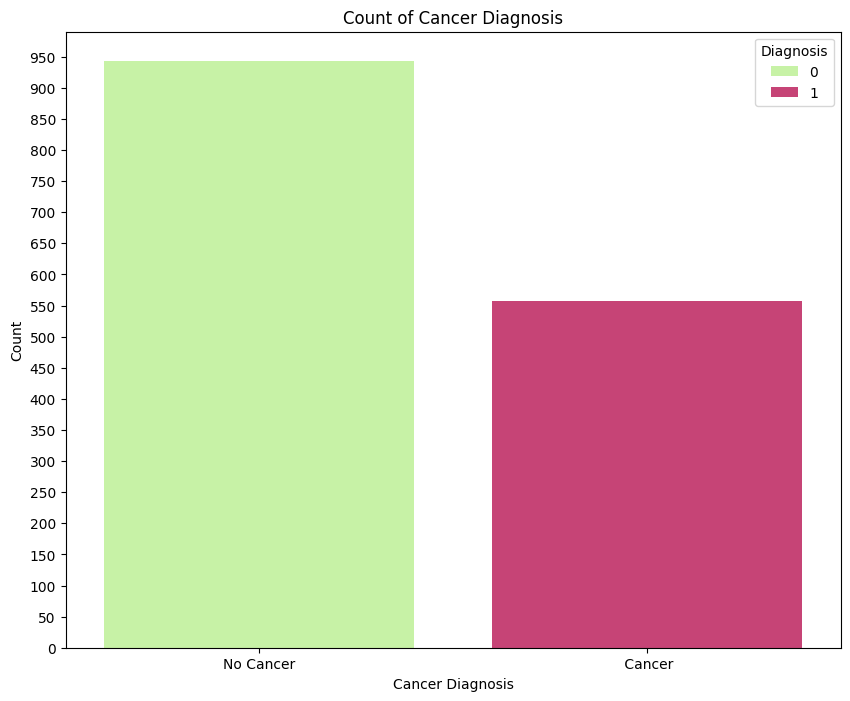

In [117]:
#set cancer diagnosis colors
cancer_p =  ["#C5FF99", "#DB2F71"] 
# set the figure size for the plot
plt.figure(figsize=(10,8))
# graph assigned to seaborn countplot() method to create a count plot to visualize the distribution of  gender in the DataFrame
# data = dfInsure to indicate the data to be used for the count
# x = "Diagnosis" to set  the variable to be used for the x-axis
graph = sns.countplot(data=dfCan, x='Diagnosis', palette=cancer_p, hue='Diagnosis') #(Waskom.Michael, 2024)
graph.yaxis.set_major_locator(MaxNLocator(nbins=20)) 
# set the x-ticks to display the labels for the x-axis
plt.xticks([0, 1], ['No Cancer',' Cancer'])
plt.title('Count of Cancer Diagnosis')
plt.xlabel('Cancer Diagnosis')
plt.ylabel('Count')

In [118]:
print("\nFrequencies for the Cancer Diagnosis (target variable):")
print(dfCan['Diagnosis'].value_counts())


Frequencies for the Cancer Diagnosis (target variable):
Diagnosis
0    943
1    557
Name: count, dtype: int64


The count plot illustrates the frequency distribution individuals with a positive cancer diagnosis. 
Within the sample of 1500 individuals, greater proportion of individuals do not have cancer, while a smaller subset has been diagnosis with cancer.\
943 individuals don't have cancer, and 557 individuals have cancer.

Therefore, the dataset has an uneven distribution of the target variable, this could negatively impact the performance of the classification model. As individuals who don't have cancer may be favoured in training (Roepke, 2024).
The imbalance will be considered through model selection and method, such as as class weighting and cross validation (Roepke, 2024).

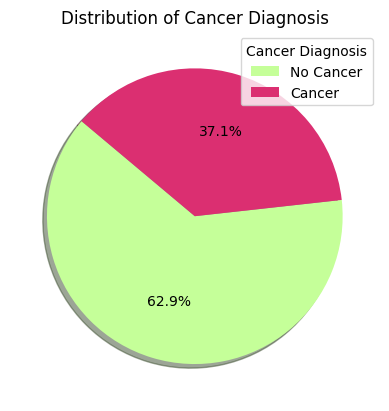

In [119]:
plt.Figure(figsize=(15,8))
# Create a pie chart to visualize the distribution of the 'Diagnosis' column in the DataFrame
can_counts = dfCan['Diagnosis'].value_counts() #(W3Schools, 2025)
# create the pie chart
plt.pie(can_counts, colors=cancer_p, autopct='%1.1f%%', shadow=True, startangle=140) #(W3Schools, 2025)
plt.title('Distribution of Cancer Diagnosis')
plt.legend(title='Cancer Diagnosis', labels=['No Cancer', 'Cancer'],loc='upper right',bbox_to_anchor=(1, 1))
plt.show()


Within the sample of 1500 individuals, 62.9% of individuals have a negative cancer diagnosis, while a smaller subset of 37.1% has positive cancer diagnosis.

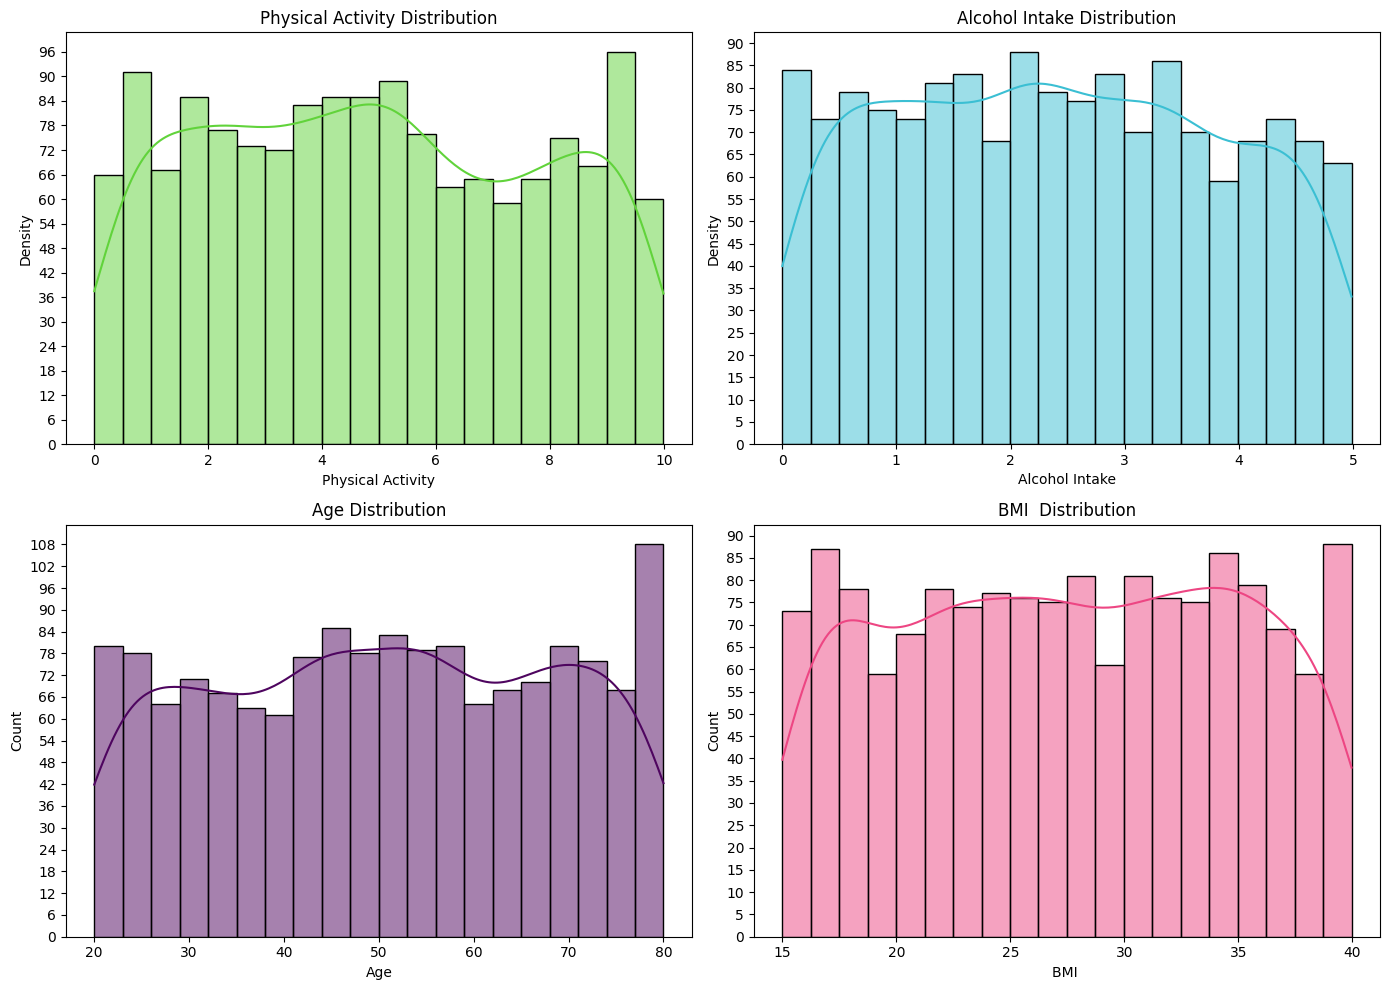

In [120]:
# Set the overall figure size
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  #(Beit, 2021)

# Plot 1 => Diagnosis
#create seaborn histplot to visualize the distribution of 'PhysicalActivity' in the DataFrame
# x , set to 'PhysicalActivity' 
# color, set to '#61D33B' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the first subplot in the 2x2 grid
sns.histplot(dfCan['PhysicalActivity'],  color="#61D33B", bins=20, kde=True,ax=axes[0, 0]) #(Beit, 2021)
axes[0, 0].set_title('Physical Activity Distribution')
axes[0, 0].set_xlabel('Physical Activity')
axes[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[0, 0].set_ylabel('Density')
# Plot 2 => Alcohol Intake
# create seaborn histplot to visualize the distribution of 'AlcoholIntake' in the DataFrame
# x , set to 'AlcoholIntake'
# color, set to '#3BBFD3' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the second subplot in the 2x2 grid
sns.histplot(dfCan['AlcoholIntake'], color="#3BBFD3", bins=20, kde=True,ax=axes[0, 1]) #(Beit, 2021)
axes[0, 1].set_title('Alcohol Intake Distribution')
axes[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[0, 1].set_xlabel('Alcohol Intake')
axes[0, 0].set_ylabel('Density')
# Plot 3 => Age
# create seaborn histplot to visualize the distribution of 'Age' 
# x, set to 'Age' 
# color, set to '#4E055F' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the fourth subplot in the 2x2 grid
sns.histplot(dfCan['Age'], color="#4E055F", bins=20, kde=True,ax=axes[1, 0]) #(Beit, 2021)
axes[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
# Plot 4 => BMI 
# create seaborn histplot to visualize the distribution of 'BMI' in the DataFrame
# x , set to 'BMI'
# color, set to '#ED4683' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the third subplot in the 2x2 grid
sns.histplot(dfCan['BMI'], color="#ED4683", bins=20, kde=True,ax=axes[1, 1]) #(Beit, 2021)
axes[1, 1].set_title('BMI  Distribution')
axes[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[1, 1].set_xlabel('BMI ')
axes[0, 1].set_ylabel('Density')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### **Physical Activity (Plot 1, Green):** 
Data points for Physical Activity fall between 0 to 10 are concentrated in a narrow range. Approximately 60 to 96 along the y-axis (density). As a result, the Kernel Density Estimate (KDE) curve has flattened peaks and tails are broadly spreads. This makes the plot distribution resemble a platykurtic distribution. The flatten peaks suggest that data points have a relatively equal frequency across the range, rather than clustered around a central point. Furthermore, the light tails show an even spread of data within the plot tails and suggest a lower likelihood of outliers.

#### **Alcohol Intake (Plot 2, Blue):** 
Similarly, the Alcohol Intake plot too resembles a platykurtic distribution. With the KDE curve peaks slightly more flattened and tails also broadly spread. The flatten peaks indicate that data points have a relatively equal frequency across the range, while light tails indicate an even spread of data within the plot tails and suggest a lower likelihood of outliers. However, data points for Alcohol Intake fall between 0 to 5 and are narrowly conentrated . Ranging from approximately 60 to just above 85 along the y-axis (density).
#### **Age (Plot 3, Pink):** 
Data points for Age fall between 20 and 80, with the density of points ranging from just below 66 to below 108 . The KDE curve show three noticeable peaks making the lot resembling weak multimodal distribution. The peaks indicates a higher frequnecy individuals in their 30's, 50's and 70's on the x-axis (age). Overall the curve has flattened peaks, suggesting an even distribution across age groups .The light tails and low kurtois , indicates  a wide spread of datapoints ane lower likelihood of outliers. However, there is signifinact portion of datapoint for individuals aged approximately  75 to 80, which contribute the the third peak and hilights a signifinact portion of older individuals in the dataset. 

#### **BMI (Plot 4, Purple):** 
The BMI plot also appears to have a platykurtic distribution. As the KDE curve peaks curve has flattened peaks and tails widely spreads. BMI data points fall between 15 to 40 and also tightly concentrated, ranging from approximately 60 to 85 along the y-axis (density). The flatten peaks indicate that data points have a uniform spread accross the range and light tails a lower likelihood of outliers.
<!-- https://www.investopedia.com/terms/k/kurtosis.asp#toc-using-kurtosis
https://www.linkedin.com/posts/rajsukhdeo_kurtosis-of-a-normal-distribution-is-3-activity-7264116164480413697-38Dw/
https://365datascience.com/calculators/kurtosis-calculator/
https://www.statology.org/multimodal-distribution/ --> 

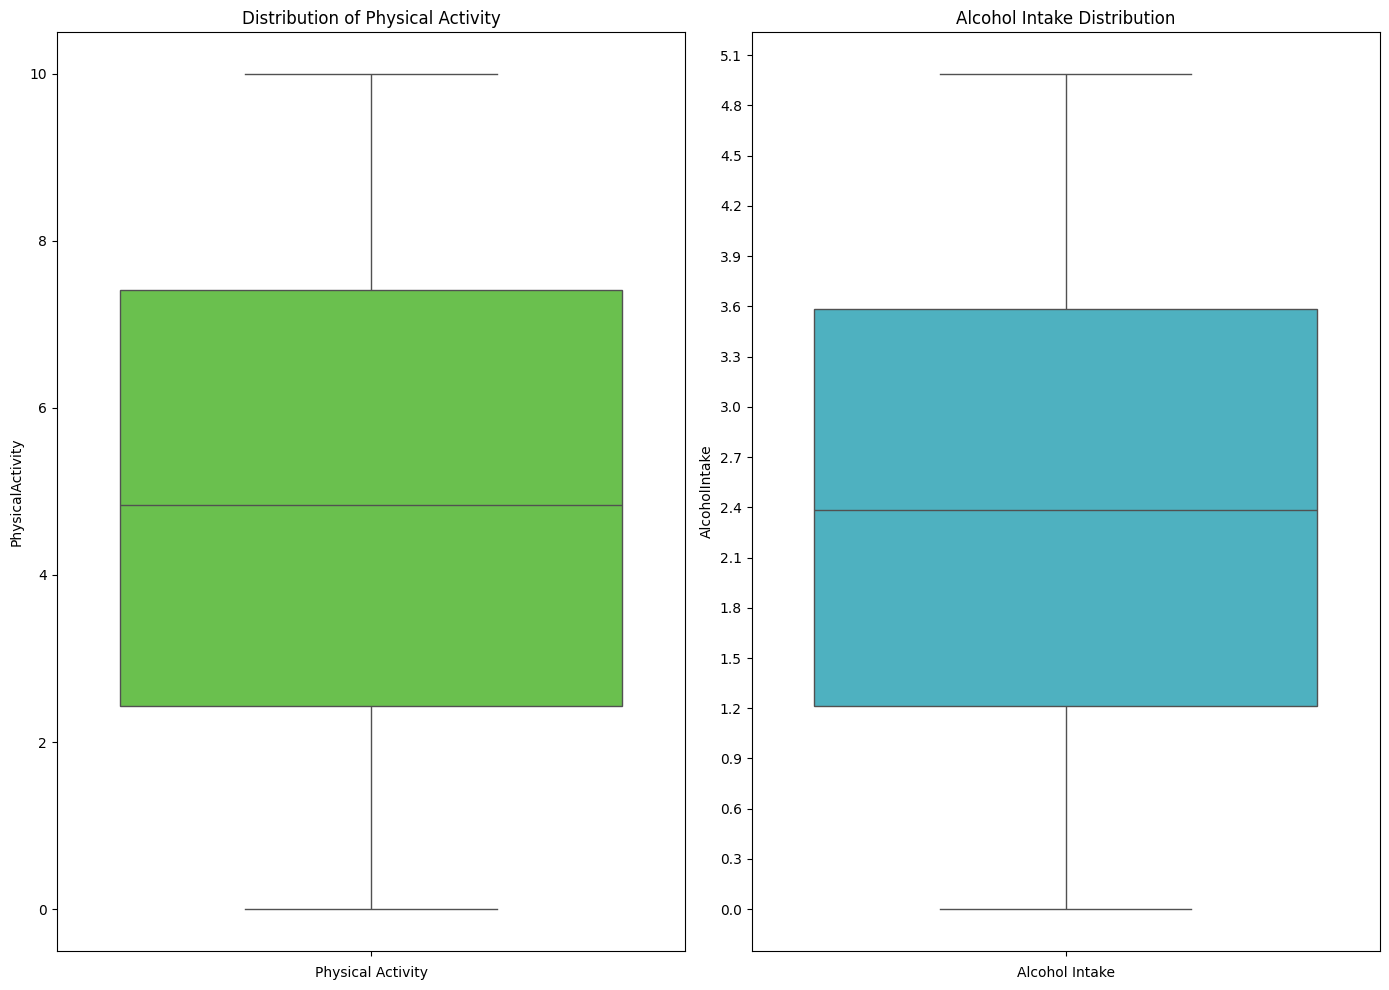

In [ ]:
# Set the overall figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 10))  

# Plot 1 => Diagnosis
#create seaborn boxplot to identify outliers for 'PhysicalActivity' in the DataFrame
# y , set to 'PhysicalActivity' 
# color, set to '#61D33B' for color scheme
# ax, set to the first subplot in the grid
sns.boxplot(data=dfCan, y='PhysicalActivity', color="#61D33B", ax=axes[0])
axes[0].set_title('Distribution of Physical Activity')
axes[0].set_xlabel('Physical Activity')
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=20))

# Plot 2 => Alcohol Intake
# create seaborn histplot to visualize the distribution of 'AlcoholIntake' in the DataFrame
# y , set to 'AlcoholIntake'
# color, set to '#3BBFD3' for color scheme
# ax, set to the second subplot in the grid
sns.boxplot(data=dfCan, y='AlcoholIntake', color="#3BBFD3", ax=axes[1])
axes[1].set_title('Alcohol Intake Distribution')
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[1].set_xlabel('Alcohol Intake')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

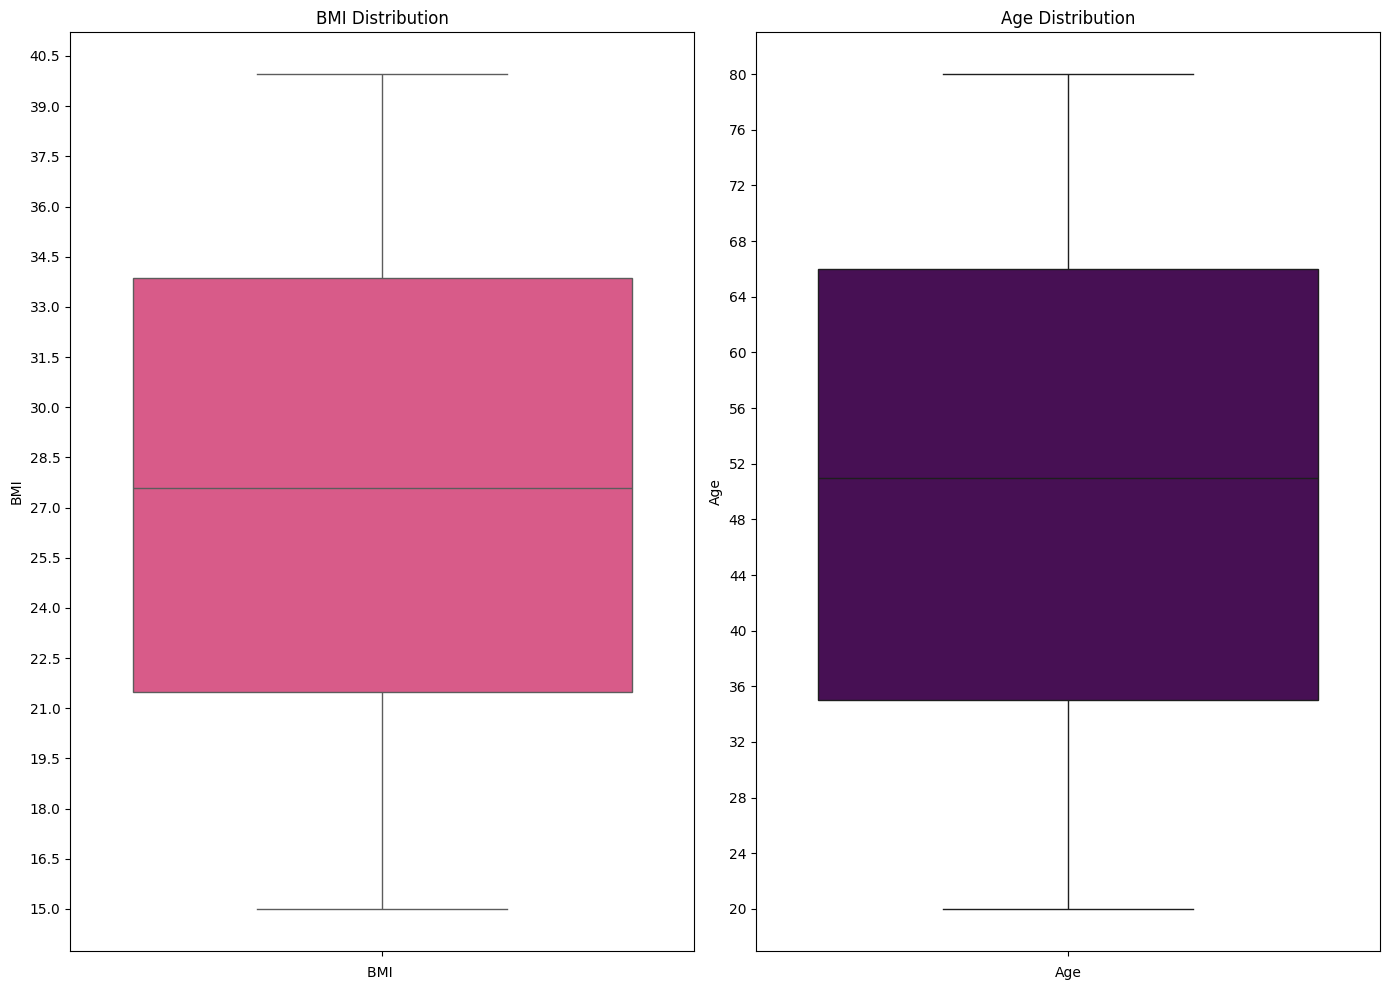

In [122]:
# Set the overall figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 10))   #(Beit, 2021)

# Plot 1 => BMI 
# create seaborn boxplot to identify outliers in the 'BMI' column of the DataFrame
# y , set to 'BMI'
# color, set to '#ED4683' for color scheme
# ax, set to the first subplot in grid
sns.boxplot(data=dfCan, y='BMI', color="#ED4683", ax=axes[0])#(Beit, 2021)
axes[0].set_title('BMI Distribution')
axes[0].set_xlabel('BMI ')
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=20))

# Plot 2 => Age
# create seaborn boxplot to identify outliers in the 'Age' column of the DataFrame
# color, set to '#4E055F' for color scheme
# ax, set to the second subplot in the grid
sns.boxplot(data=dfCan, y='Age', color="#4E055F", ax=axes[1])#(Beit, 2021)
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=20))
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## **Bi-variate and  Multivariate Analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

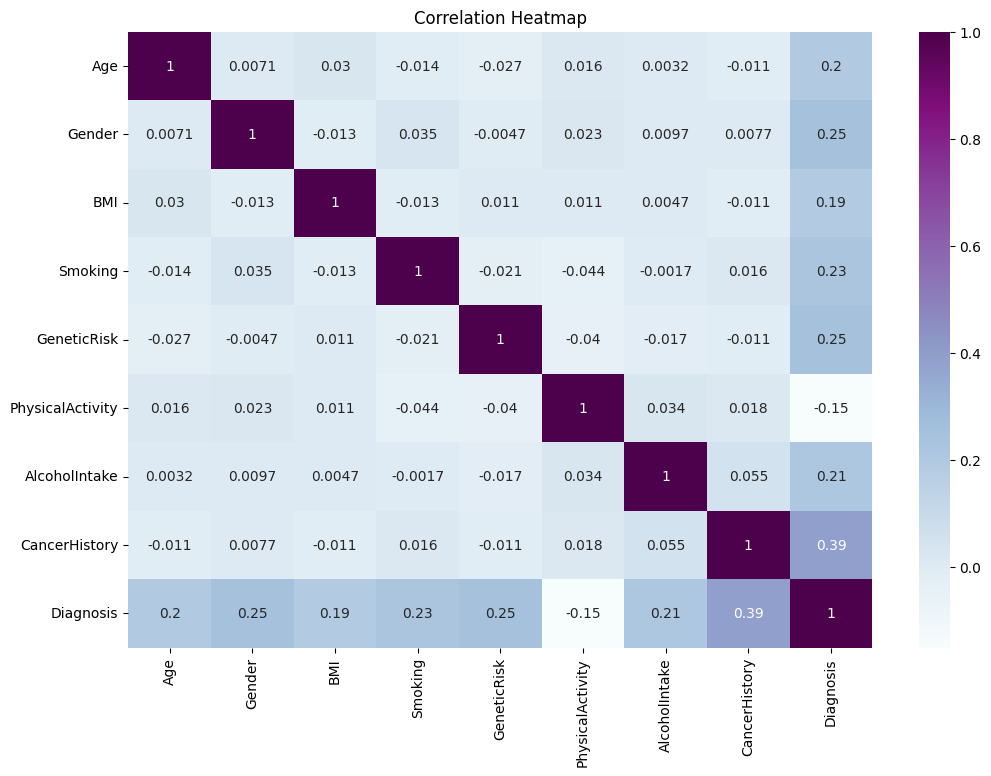

In [123]:

# assigning variable dfCorr to the correlation matrix of the DataFrame
# pandas corr() method to calculate the correlation between numerical features in the DataFrame
# The correlation matrix will help to identify any multicollinearity issues in the data and understand the relationships between features
dfCorr = dfCan.corr()
plt.figure(figsize=(12,8))
# seaborn heatmap() method to create a heatmap to visualize the correlation matrix
# data = dfCorr to indicate the data to be used for the heatmap
# annot=True to display the correlation values on the heatmap
sns.heatmap(dfCorr, annot=True, cmap='BuPu') #(Waskom, 2024)
# plt.title() to set the title of the heatmap
plt.title('Correlation Heatmap')



A correlation heat map shows the correlation between all variables in a dataset. The pandas method "dataframe.corr()" is used to calculate the correlation coefficient for each variable in the dataset (NumFOCUS Inc, 2025) .The method returns a float between 1 and -1, indicating the correlation between each pair of variables (NumFOCUS Inc, 2025) .1 indicates perfect correlation, 0 indicates no correlation and -1 perfect negative correlation (Jain, 2024). The seaborn heatmap is used to visualizes the matrix, darker shades (purple ) indicate a stronger correlation.
### *Insights* 
- All correlations for the pair of like variables results in 1.0, plotted on the diagonal of the heatmap.
- Diagnosis has a weak positive correlation with Cancer History, Alcohol Intake, Smoking, Gender, Age, BMI and Genetic Risk features. If one of these categorical features are true (yes=1), the likelihood of a positive cancer diagnosis increases.\
 For age, if a member is older there is a slightly higher chance of a positive cancer diagnosis 
- 0.39 is the highest correlation between Diagnosis and Cancer History. However, it is a moderate correlation.
- Diagnosis has a weak negative correlation with Physical Activity. For member that are physical activity in the day, there is a slightly lower chance of a positive cancer diagnosis
- The overall correlations between predictor variable ( features ) are overall very weak, indicating a low degree of multicollinearity. 

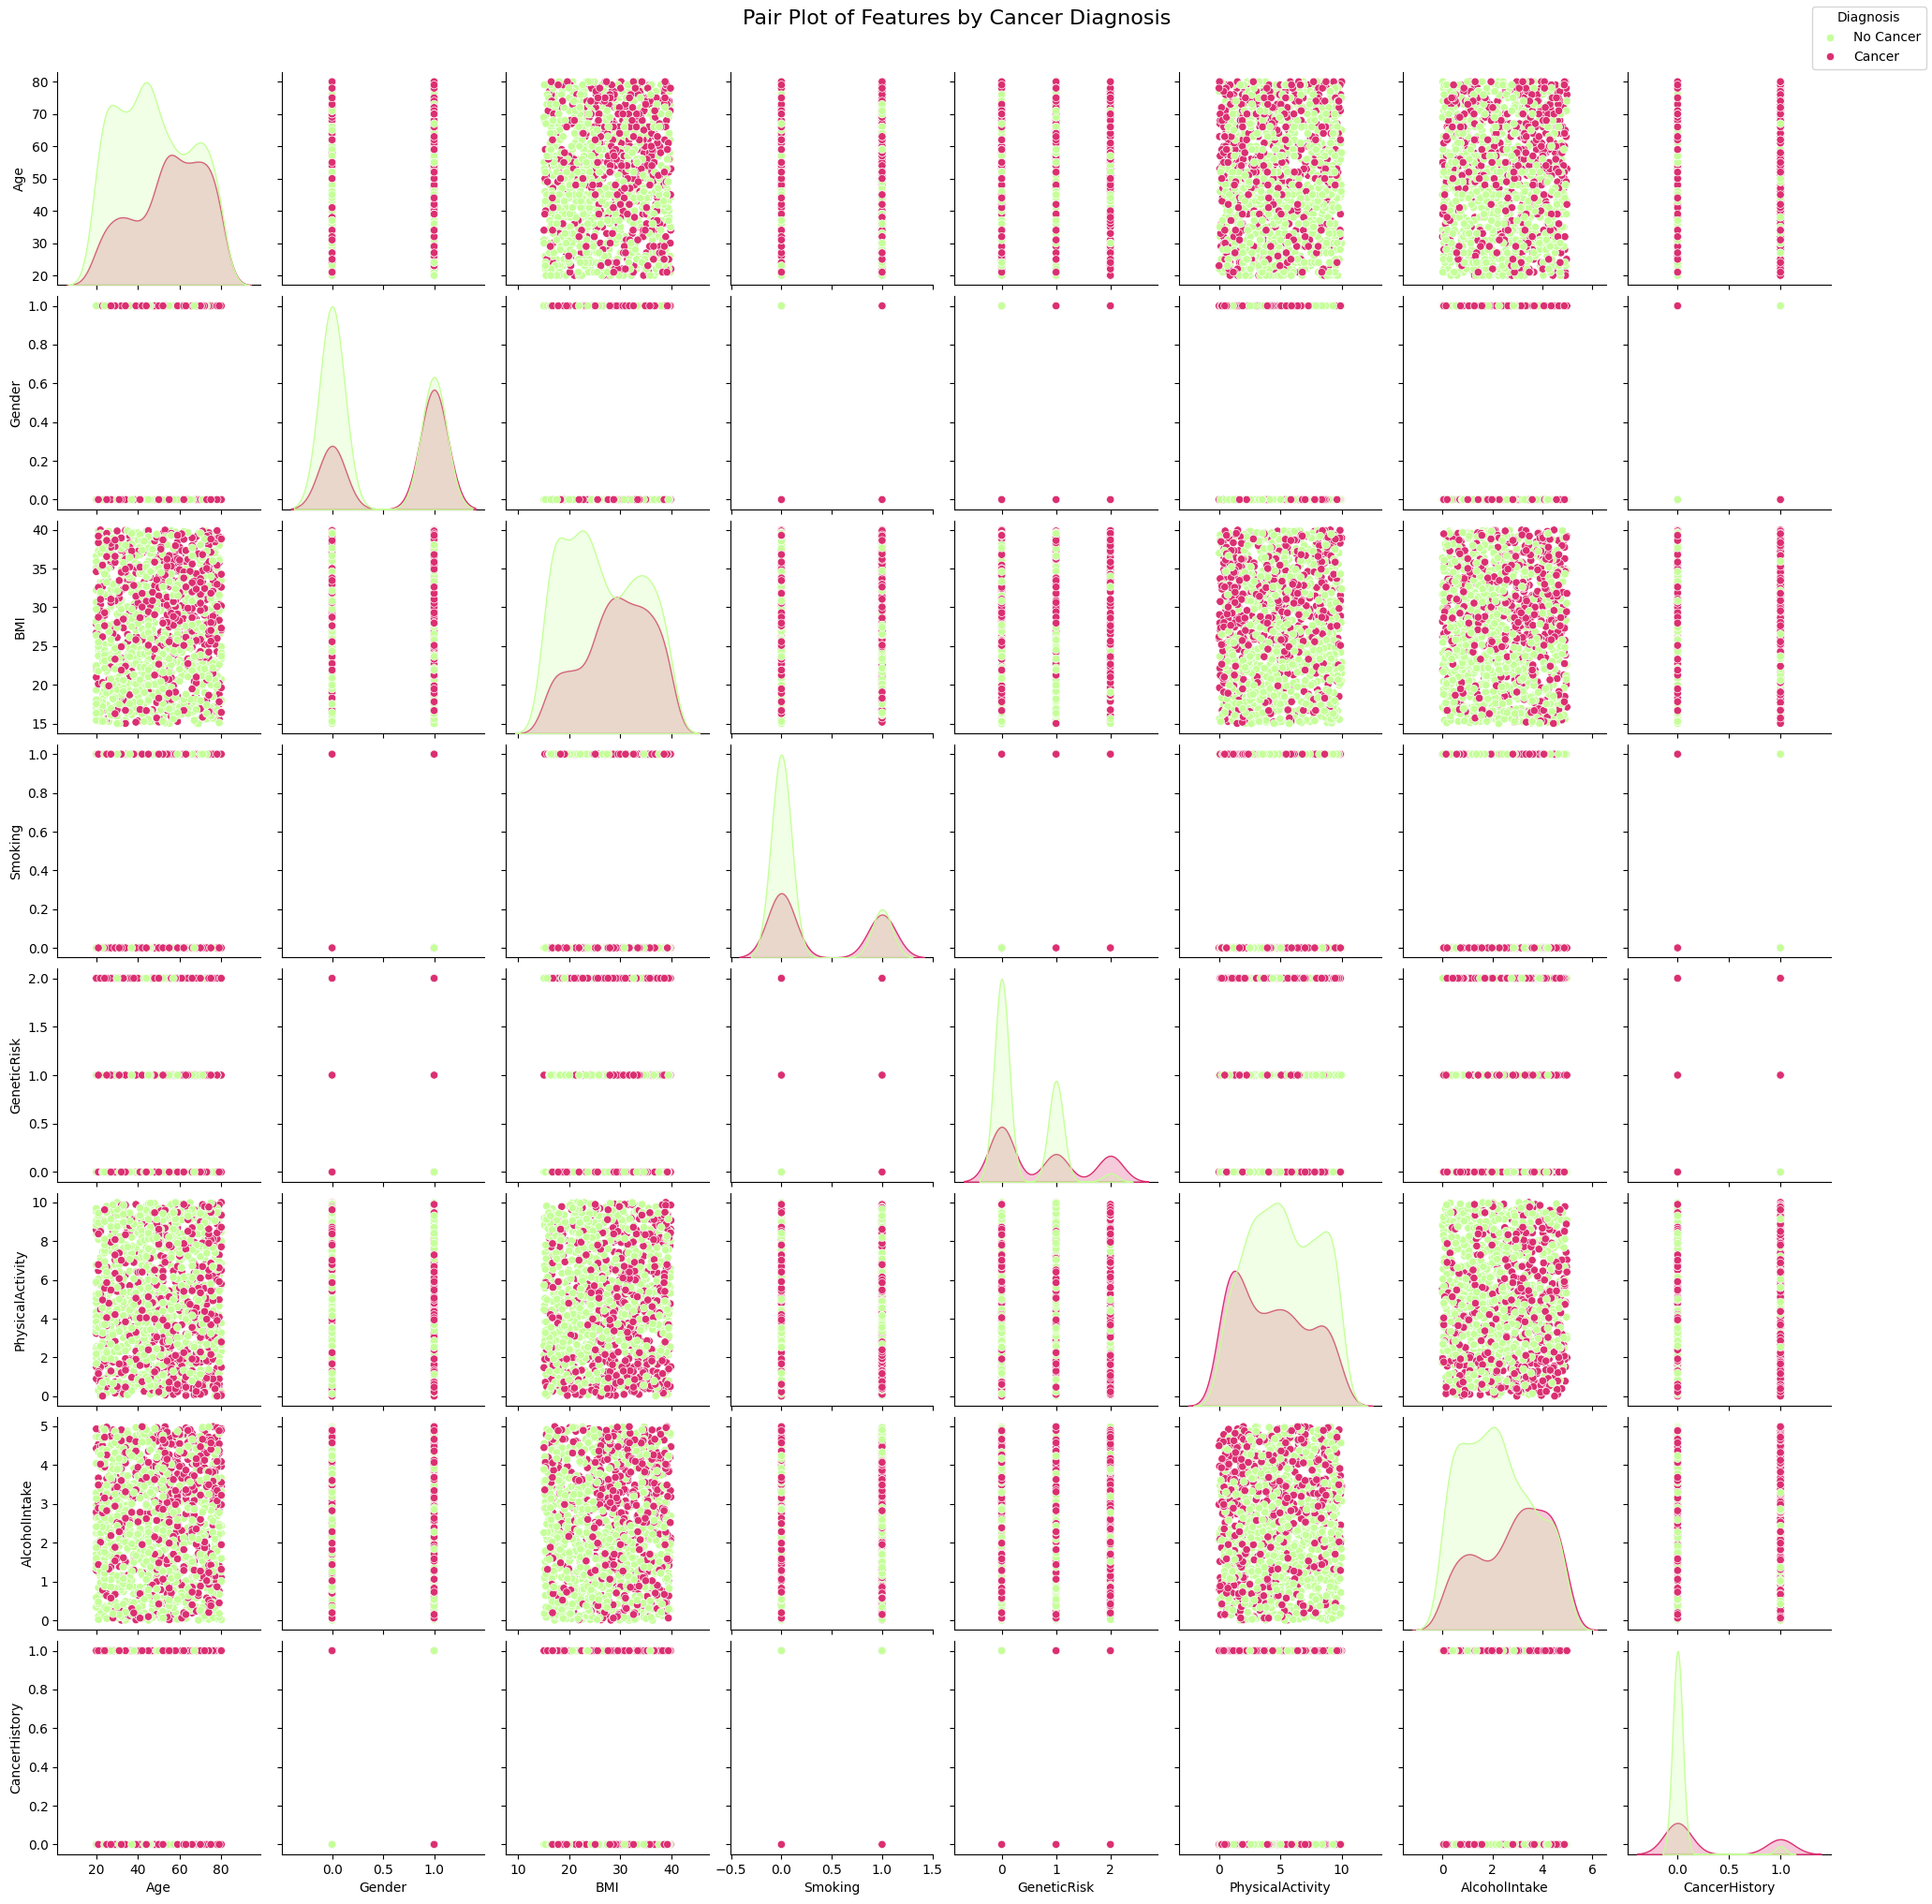

In [124]:

# Seaborn pairplot() method to create a pair plot to visualize the relationships between features in the DataFrame according to smoker status
# hue='Diagnosis' to set  the variable to be used for coloring the points in the pair plot
graph = sns.pairplot(dfCan, hue="Diagnosis", palette=cancer_p , hue_order=[0, 1], height=2.5) #(Waskom, 2024)
# Set the graph legend to display the labels for the cancer diagnosis categories
graph._legend.set_loc('upper right')  
graph._legend.set_frame_on(True)
graph._legend.texts[0].set_text('No Cancer')
graph._legend.texts[1].set_text('Cancer')
# set the title of the pair plot
plt.suptitle('Pair Plot of Features by Cancer Diagnosis', y=1.02, fontsize=16)
plt.show()

*Green: No Cancer or Negative Cancer Diagnosis*\
*Red: Cancer or Positive Cancer Diagnosis*

Above is a pairwise scatter plot for further investigate the relationships between each pair of variables. The pairwise scatter plots give a brief overview of the general trends, patterns and correlations within the dataset variables (Ahluwalia, 2024; Waskom, 2024b). This will help to understand which variables have a significant influence of the target variable.

The above pairwise scatter plot has been created with the 'Diagnosis' feature as a hue, to gauge the effect or influence of positive and negative cancer diagnosis on each variable.

- The diagonal plots show the distribution of a single variable. Each of the distribution plots shows that there are more individuals with negative cancer diagnosis than positive in the dataset.
- The cancer clusters (red) do not show a distinct association across plots, as clusters are spread over a wide area for each feature's plots values.
#### *Notable Observations:* 
**Age**
- BMI vs. Age: Plot display denser cancer clusters (red) for individuals in the upper-middle age group and with an BMI above 30 (overweight).
- This suggest that older age and high BMI may increase chaces of a positive cancer diagnosis. 

**Smoking**
- Smoking vs. Gender: Plot cancer clusters (red) are concentrated for males that are both smokers and nonsmoke. While for females, the cancer clusters (red) are concentrated for individuals’ smoke.
- Smoking vs. Genetic Risk: The plot shows concentrated cancer clusters (red) individuals both smoker and don't smoke across medium and high genetic risk. For low risk, cancer clusters (red)  are concentrated for just individuals that smoke.
- This suggest that smoking may contribute to the chances of a positive cancer diagnosis. 

**Physical Activity**
- The plots versus Age, Alcohol Intake and BMI shows denser cancer clusters for activity ranging from 0 to 2 hours a day.
- This suggest lower activity may reduce an individual chances of a positive cancer diagnosis. 

In [125]:

# Perform Chi-Squared test to check the relationship between features and target variable
features = ['Smoking', 'GeneticRisk', 'CancerHistory', 'Gender']
target = 'Diagnosis'
output = []
# Loop through each feature
for feature in features: # (shafqaatahmad, 2021; Subhash C. Davar, 2022)
    # Contingency table between feature and target
    crosstab = pd.crosstab(dfCan[feature], dfCan[target])
    # perform Chi-Squared test
    # chi2_contingency() method to perform the Chi-Squared test on the contingency table
    score, pVal, dFree, expected = chi2_contingency(crosstab) # (shafqaatahmad, 2021; Subhash C. Davar, 2022)

    # Store results
    output.append({
        'Feature': feature,
        'Chi-Squared Score': score,
        'p-value': pVal
    })

# create a DataFrame to store the results of the Chi-Squared test
chi2_df = pd.DataFrame(output)
chi2_df = chi2_df.sort_values(by='Chi-Squared Score', ascending=False)

# Display
print("Chi-Squared Test Results (Feature vs Diagnosis):")
chi2_df

Chi-Squared Test Results (Feature vs Diagnosis):


,Feature,Chi-Squared Score,p-value
2,CancerHistory,228.410798,1.324116e-51
1,GeneticRisk,167.432582,4.390124e-37
3,Gender,92.968527,5.313258e-22
0,Smoking,76.237267,2.515495e-18


To determine if each categorical feature has an association with the Diagnosis feature (target variable), a chi test can used to evaluate whether the variables are independent (Rihaldijiran, 2024; Minitab, 2025). If the p-value it less than a significance level of 0.05, it indicates that an association exists between the target and feature (Rihaldijiran, 2024; Minitab, 2025). 

##### **Cancer History:** 
The feature Cancer History has the lowest p-value (1.324116e-51) and is less than 0.05. Cancer History has a statistically significant association the target feature, Diagnosis. The chi-squared score (228.4) is very high. This indicates feature is very strong predictor of cancer.

##### **Genetic Risk:** 
The feature Genetic Risk has a low p-value (4.390124e-37), less than 0.05. It suggests a strong association with the target feature, Diagnosis. The chi-squared score (167.43) is a high value. This indicates feature is strong predictor of cancer.
##### **Gender:** 
The feature Gender's p-value (5.313258e-22) is less than 0.05. Therefore, the feature has a statistically significant association with the target feature, Diagnosis. The chi-squared score (92.96) is a moderate value. This indicates feature is moderate predictor of cancer.

##### **Smoking:** 
The feature Smoking's p-value (5.313258e-22) is less than 0.05. Therefore, the feature has a statistically significant association with the target feature, Diagnosis. The chi-squared score (76.23) is a moderate to low value. This indicates feature is moderate to low predictor of cancer.


In [127]:
# set custom palette 
cust_p =  ["#C5FF99", '#66B2FF', "#962BAC"]

# Prepare data
bar_data = dfCan.groupby(['Smoking', 'Diagnosis']).size().reset_index(name='Count')#(Plotly, 2025a)
smoking_labels = ['Non-smoker', 'Smoker']

# Get counts for each diagnosis group
counts_no_cancer = bar_data[bar_data['Diagnosis'] == 0]['Count'].values
counts_cancer = bar_data[bar_data['Diagnosis'] == 1]['Count'].values

fig = go.Figure(data=[
    go.Bar(name='No Cancer', x=smoking_labels, y=counts_no_cancer, marker_color=cust_p[0]),
    go.Bar(name='Cancer', x=smoking_labels, y=counts_cancer, marker_color=cust_p[1])
])#(Plotly, 2025a)

fig.update_layout(
    barmode='group',
    title='Smoking Status by Cancer Diagnosis',
    xaxis_title='Smoking Status',
    plot_bgcolor="#646161",  
    yaxis_title='Count',
    legend_title='Cancer Diagnosis'
)#(Plotly, 2025a)

fig.show()

The barplot provides an insight into the distribution of smoking and a non-smoking individuals, according their cancer diagnosis.\
Non-smokers:
- The bars for non-smokers displays, a greater proportion of individuals have a negative cancer diagnosis and a smaller subset a positive cancer diagnosis.
- For the smoker population, 762 individuals do not have cancer (green), while 334 individuals do have cancer (blue).
- This indicates that non-smokers are more likely to have a negative cancer diagnosis.  

Smokers:
- The bar for smoker’s displays, a greater proportion of individuals have a positive cancer diagnosis, while a smaller subset a negative cancer diagnosis.
- For the smoker population of 404, 223 individuals have cancer (blue), and 181 individuals do not have cancer (green).
- There is a small difference (42) between a positive cancer diagnosis and a negative cancer diagnosis, this indicates that smoking has a potential association with a have a slightly higher probability of a positive diagnosis.

Observations suggests that smoking status has a possible association of a positive cancer diagnosis.\
However, there is a small difference (111) between non-smoking and smoking individuals that have cancer.\
Therefore, smoking may not be a strong predictor for cancer.


In [128]:
# Prepare data
bar_data = dfCan.groupby(['GeneticRisk', 'Diagnosis']).size().reset_index(name='Count')#(Plotly, 2025a)
genRisk_labels = ['Low', 'Medium', 'High']#(Plotly, 2025a)

# Get counts for each diagnosis group
counts_no_cancer = bar_data[bar_data['Diagnosis'] == 0]['Count'].values #(Plotly, 2025a)
counts_cancer = bar_data[bar_data['Diagnosis'] == 1]['Count'].values

fig = go.Figure(data=[
    go.Bar(name='No Cancer', x=genRisk_labels , y=counts_no_cancer, marker_color=cust_p[0]),
    go.Bar(name='Cancer', x=genRisk_labels , y=counts_cancer, marker_color=cust_p[1])
])#(Plotly, 2025a)

fig.update_layout(
    barmode='group',
    title='Genetic Risk by Cancer Diagnosis',
    xaxis_title='Genetic Risk',
    plot_bgcolor="#646161",  
    yaxis_title='Count',
    legend_title='Cancer Diagnosis'
)#(Plotly, 2025a)

fig.show()

The barplot provides an insight into the distribution of genetic risk levels, according cancer diagnosis.\
Low Risk:
- The bar for low genetic risk shows a greater proportion of individuals have a negative cancer diagnosis, while a smaller subset a positive cancer diagnosis.
- For the low risk population, 282 individuals have cancer (blue), and 613 individuals do not have cancer (green).
- This indicates that individuals with a low genetic risk are more likely to have a negative cancer diagnosis.  


Medium Risk:
- The bar for medium genetic risk shows a greater proportion of individuals have a negative cancer diagnosis, while a smaller subset a positive cancer diagnosis.
- For the medium risk population, 142 individuals have cancer (blue), and 305 individuals do not have cancer (green).
- This indicates that individuals with a medium genetic risk are more likely to have a negative cancer diagnosis.   

High Risk:
- The bar for high genetic risk shows a greater proportion of individuals have a positive cancer diagnosis, while a smaller subset a negative cancer diagnosis.
- For the high risk population of 158 , 133 individuals have cancer (blue), and 25 individuals do not have cancer (green).
- There is a sizeable difference (108) between individuals who have cancer and do not. This suggests that high genetic risk has a potential association with positive cancer diagnosis.
 
Observations suggests that low and medium genetic risk may not be strong predictors for cancer.\
However, high genetic risk shows a strong association with cancer and may be a strong predictor.


In [129]:
# Prepare data
bar_data = dfCan.groupby(['Gender', 'Diagnosis']).size().reset_index(name='Count') #(Plotly, 2025a)
gender_labels = ['Male', 'Female'] #(Plotly, 2025a)

# Get counts for each diagnosis group
counts_no_cancer = bar_data[bar_data['Diagnosis'] == 0]['Count'].values #(Plotly, 2025a)
counts_cancer = bar_data[bar_data['Diagnosis'] == 1]['Count'].values 

fig = go.Figure(data=[
    go.Bar(name='No Cancer', x=gender_labels  , y=counts_no_cancer, marker_color=cust_p[0]),
    go.Bar(name='Cancer', x=gender_labels  , y=counts_cancer, marker_color=cust_p[1])
]) #(Plotly, 2025a)

fig.update_layout(
    barmode='group',
    title='Gender by Cancer Diagnosis',
    xaxis_title='Gender',
    plot_bgcolor="#646161",   
    yaxis_title='Count',
    legend_title='Cancer Diagnosis'
)#(Plotly, 2025a)

fig.show()

The barplot provides an insight into the distribution of male and females, according to their cancer diagnosis.\
Males:
- The bar for males shows a greater proportion of males have a negative cancer diagnosis and a smaller subset a positive cancer diagnosis.
- For the male population of 764, 571 individuals do not have cancer (green), while 193 individuals do have cancer (blue).  
- The bars for non-smokers display, a greater proportion of individuals have a negative cancer diagnosis and a smaller subset a positive cancer diagnosis.
- This suggests that males are more likely to have a negative cancer diagnosis.

Female:
- The bar for females shows an almost even distribution of females with a positive cancer diagnosis and females with a negative cancer diagnosis.
- For the female population of 737, 365 individuals have cancer (blue), and 372 individuals do not have cancer (green).
-There is a small difference (7) between a positive cancer diagnosis and a negative cancer diagnosis, this suggest being female is a associated with a positive cancer diagnosis.
 
The distribution of males and females nearly equal, from the distribution females have a higher rate of cancer (365) compared to males that have cancer (193).\
Observations suggests that gender may be a moderate predictor of a positive cancer diagnosis. 


In [130]:
# Prepare data
bar_data = dfCan.groupby(['CancerHistory', 'Diagnosis']).size().reset_index(name='Count') #(Plotly, 2025a)
canHis_labels = ['No Cancer History', 'Cancer History']#(Plotly, 2025a)

# Get counts for each diagnosis group
counts_no_cancer = bar_data[bar_data['Diagnosis'] == 0]['Count'].values#(Plotly, 2025a)
counts_cancer = bar_data[bar_data['Diagnosis'] == 1]['Count'].values

fig = go.Figure(data=[
    go.Bar(name='No Cancer ', x=canHis_labels  , y=counts_no_cancer, marker_color=cust_p[0]),
    go.Bar(name='Cancer', x=canHis_labels , y=counts_cancer, marker_color=cust_p[1])
])#(Plotly, 2025a)

fig.update_layout(
    barmode='group',
    title='Cancer History by Cancer Diagnosis',
    xaxis_title='Cancer History',
    plot_bgcolor="#646161",  
    yaxis_title='Count',
    legend_title='Cancer Diagnosis'
)#(Plotly, 2025a)

fig.show()

The barplot provides an insight into the distribution of individuals with and without a prevoius history of cancer, according their cancer diagnosis.\
No Cancer History:
- The bars for no cancer history displays, a greater proportion of individuals have a negative cancer diagnosis and a smaller subset a positive cancer diagnosis.
- For the population with no cancer history, 907 individuals do not have cancer (green), while 377 individuals do have cancer (blue).
- This indicates that individuals with no cancer history are more likely to have a negative cancer diagnosis.  

Cancer History:
- The bar for cancer history shows a greater proportion of individuals have a positive cancer diagnosis, while a smaller subset a negative cancer diagnosis.
- A population of 216 have a history of cancer, 180 individuals have cancer (blue), and 36 individuals do not have cancer (green).
- There is a sizeable difference (144) between individuals who have cancer and do not. This suggests cancer history has a potential association with positive cancer diagnosis.  

Observations suggests that no cancer history may not be strong predictor for cancer.\
However, cancer history shows a strong association with cancer and may be a strong predictor.


In [156]:
# set data for from diagnosis and physical activity
x1 = dfCan[dfCan['Diagnosis'] == 0]['PhysicalActivity']#(Guerrini, 2021; Plotly, 2025b)
x2 = dfCan[dfCan['Diagnosis'] == 1]['PhysicalActivity']
hist_data = [x1, x2]
# labels for the groups
group_labels = ['No Cancer', 'Cancer'] #(Guerrini, 2021; Plotly, 2025b)

# create a distribution plot using Plotly
# pass the hist_data and group_labels to the create_distplot() method
fig = ff.create_distplot(hist_data,group_labels,show_hist=False,show_rug=False) #(Guerrini, 2021; Plotly, 2025b)

#set the colors for the KDE lines
fig.data[0].line.color = "#15C02C"  
fig.data[1].line.color = "#DB2F71"

# update the layout of the figure
# set the title, x-axis and y-axis labels, legend title, and figure size
fig.update_layout(
    title='Physical Activity Distribution by Cancer Diagnosis',
    xaxis_title='Physical Activity',
    yaxis_title='Density',
    legend_title='Cancer Diagnosis',
    height=700,
    width=1000
)#(Guerrini, 2021; Plotly, 2025b)

fig.show()

The displot provide insight into the distribution 'Physical Activity' by 'Cancer' diagnosis.
#### **No Cancer (Green)**
- The distribution for 'No Cancer’ spans the full range of on the x-axis (0 to 10 hr/day). This is seen by the widespread distribution with flattened peaks.
- The distribution of the plot has two slight peaks, falling at approximately 4.5 to 5.5 hours and 8.3 to 9.5 hours.  This suggests a higher density of moderate to highly active individuals.
- The distribution is slightly skewed to the left. Peaks are at higher physical activity range and a long tail extends towards lower levels of activity.
- The plot suggests that individuals with no cancer have moderate to high physical activity level. 

#### **Cancer (Red)**
- The distribution for 'Cancer' also spans the full range of on the x-axis (0 to 10 hr/day).
- In contrast, the distribution has a defined peak concentrated at low levels of activity. Ranging from approximately 0 to 2.5 hours of activity. This suggests a higher density of individuals with low physical activity.
- The distribution is right-skewed, as the peak is at a low physical activity range and a long tail extends towards higher levels of activity.
- The plot suggests that individuals with cancer have low levels of physical activity. 

The no cancer distribution (red) compared to cancer distribution (green) is denser in higher ranges of activity.\
Furthermore, the cancer distribution (green) is highly concentrated around low levels of activity.\
Observations suggest that lower level of physical activity are  associated with cancer and may be a strong predictor.




In [132]:
# set the data for alcohol intake and diagnosis from the dfCan DataFrame
x1 = dfCan[dfCan['Diagnosis'] == 0]['AlcoholIntake'] #(Guerrini, 2021; Plotly, 2025b)
x2 = dfCan[dfCan['Diagnosis'] == 1]['AlcoholIntake']
# set the hist_data variable to a list containing the two sets of data
hist_data = [x1, x2]#(Guerrini, 2021; Plotly, 2025b)
# set the group labels for the two sets of data
group_labels = ['No Cancer', 'Cancer']#(Guerrini, 2021; Plotly, 2025b)

# create a distribution plot using Plotly
# pass the hist_data and group_labels to the create_distplot() method
fig = ff.create_distplot(hist_data,group_labels,show_hist=False,show_rug=False) #(Guerrini, 2021; Plotly, 2025b)

fig.data[0].line.color = "#15C02C"  
fig.data[1].line.color = "#DB2F71"
# update the layout of the figure
# set the title, x-axis and y-axis labels, legend title, and figure size
fig.update_layout(
    title='Alcohol Intake Distribution by Cancer Diagnosis',
    xaxis_title='Alcohol Intake',
    yaxis_title='Density',
    legend_title='Cancer Diagnosis',
    height=700,
    width=1000
)#(Guerrini, 2021; Plotly, 2025b)

fig.show()


The displot provide insight into the distribution 'Alcohol Intake' by 'Cancer' diagnosis.
#### **No Cancer (Green)**
- The distribution for the plot spans across all values on the x-axis (0 to 5 unit/week). This is seen by the widespread distribution.
- The distribution of the plot has a broad peak, falling at approximately 0.4 to 2.3 units per week. This shows a higher density of individuals have a low a alcohol intake.
-  As a result, the distribution is right-skewed. Peaks are at lower alcohol unit range and a long tail extends towards the higher range. This indicates less individuals with a high alcohol intake.
- The right skewed distribution suggests individuals with no cancer are more likely to have a lower alcohol intake per week. 

#### **Cancer (Red)**
- The distribution for this plot also spans across all values on the x-axis (0 to 5 unit/week).
- In contrast, the distribution has a broad peak concentrated at high levels of alcohol consumption. Ranging from approximately 2.6 to 4.6 units of alcohol a week. This shows a more individuals have a high alcohol intake.
- The distribution is skewed to the left, as peaks are at a high alcohol unit range and a long tail extends towards the lower range. This indicates less individual’s intake large amounts of alcohol per week.
- The left skewed distribution suggests individuals with cancer are more likely to have a high alcohol intake per week. 

The displot shows that Individuals with cancer tend to have a higher alcohol intake.\
Observations suggest that higher alcohol intake is  associated with cancer and may be a strong predictor.




In [133]:
# set data for BMI and diagnosis from the dfCan DataFrame
x1 = dfCan[dfCan['Diagnosis'] == 0]['BMI'] #(Guerrini, 2021; Plotly, 2025b)
x2 = dfCan[dfCan['Diagnosis'] == 1]['BMI']
# set the hist_data variable to a list containing the two sets of data
hist_data = [x1, x2]
# set the group labels for the two sets of data
group_labels = ['No Cancer', 'Cancer'] #(Guerrini, 2021; Plotly, 2025b)

#create a distribution plot using Plotly
# pass the hist_data and group_labels to the create_distplot() method
fig = ff.create_distplot(hist_data,group_labels,show_hist=False,show_rug=False)#(Guerrini, 2021; Plotly, 2025b)

# set the colors for the KDE lines
fig.data[0].line.color = "#15C02C"  
fig.data[1].line.color = "#DB2F71" 
# update the layout of the figure
# set the title, x-axis and y-axis labels, legend title, and figure size
fig.update_layout(
    title='BMI Distribution by Cancer Diagnosis',
    xaxis_title='BMI',
    yaxis_title='Density',
    legend_title='Cancer Diagnosis',
    height=700,
    width=1000
)#(Guerrini, 2021; Plotly, 2025b)

fig.show()

The displot provide insight into the distribution 'BMI' by 'Cancer' diagnosis.
#### **No Cancer (Green)**
- The distribution for 'No Cancer’s spans all BMI values on the x-axis (0 to 40). This is seen by the widespread distribution.
- The distribution of the plot has a broad peak, concentrated at a BMI range of approximately 17 to 24. This indicates a higher density of individuals that are underweight and healthy.
-  The distribution is right-skewed, as peaks are at lower BMI ranges and a long tail extends towards the higher range. This indicates less individuals with a high BMI.
- The right skewed distribution suggests individuals with no cancer are more likely to have a lower BMI. 

#### **Cancer (Red)**
- The distribution for 'Cancer' is also spans across all values on the x-axis (0 to 40). Seen by the widespread distribution.
- The distribution has a broader peak concentrated at higher BMI ranges. The peak fall at BMI's of approximately 26 to 36. This indicates a higher density of individuals that are overweight and obese.
- The distribution is skewed to the left, as peaks are at a high BMI range and a long tail extends towards the lower range. This indicates less individuals with a low BMI.
- The left skewed distribution suggests individuals with cancer are more likely to have a higher BMI. 

Individuals with cancer tend to be overweight or obese.\
Observations suggest that a higher BMI is associated with cancer and may be a strong predictor.




In [134]:
#set data for age and diagnosis from the dfCan DataFrame
x1 = dfCan[dfCan['Diagnosis'] == 0]['Age'] #(Guerrini, 2021; Plotly, 2025b)
x2 = dfCan[dfCan['Diagnosis'] == 1]['Age']
#set the hist_data variable to a list containing the two sets of data
hist_data = [x1, x2] #(Guerrini, 2021; Plotly, 2025b)
# set the group labels for the two sets of data
group_labels = ['No Cancer', 'Cancer'] #(Guerrini, 2021; Plotly, 2025b)

#create a distribution plot using Plotly
# pass the hist_data and group_labels to the create_distplot() method
fig = ff.create_distplot(hist_data,group_labels,show_hist=False,show_rug=False) #(Guerrini, 2021; Plotly, 2025b)

#set the colors for the KDE lines
fig.data[0].line.color = "#15C02C" 
fig.data[1].line.color = "#DB2F71" 
# update the layout of the figure
# set the title, x-axis and y-axis labels, legend title, and figure size
fig.update_layout(
  title='Age Distribution by Cancer Diagnosis',
    xaxis_title='Age',
    yaxis_title='Density',
    legend_title='Cancer Diagnosis',
    height=700,
    width=1000
)#(Guerrini, 2021; Plotly, 2025b)

fig.show()

The displot provide insight into the distribution 'Age' by 'Cancer' diagnosis.
#### **No Cancer (Green)**
- The distribution for 'No Cancer’s spread spans the full range of age values on the x-axis (20 to 80). 
- The distribution shows gentle peaks around ages 23 to 34 and 40 to 47. This suggests a higher density of younger to middle-aged individuals.
-  The distribution is skewed to the right, as peaks are at younger age range and a long tail extends towards the older range, indicating less individuals in the older range.
- The right skewed distribution indicates, individuals with no cancer are more likely to younger to middle-aged. 

#### **Cancer (Red)**
- The distribution for 'Cancer' is also spread spans the full range of age values on the x-axis (20 to 80).
- In contrast, the distribution has a broader peak concentrated at higher ages. At approximately the 51 to 75 age brackets.
- The distribution is skewed to the left, as peaks are at older age range and a long tail extends towards the younger range. Indicating less individuals in the younger age bracket. 
- The left skewed distribution suggests, individuals with cancer are more likely to be older individuals

Individuals with cancer tend to fall in the upper middle to older age range.\
Observations suggest that a higher age is associated with cancer and may be a strong predictor.




### **Feature Engineering**

##### *Genetic risk*
Genetic risk has a strong association with the target feature. However, observations suggests that low and medium genetic risk have a weaker association with the target variable (Diagnosis).High genetic risk shows a stronger association.
Extracting the high risk category as a feature may create a strong predictor and improve model’s ability to accurately predict cancer.


In [34]:
#Feature Engineering

#create a new column 'HighRisk' based on the 'GeneticRisk' column
# risk_idx is set to the index of the 'GeneticRisk' column in the DataFrame 
risk_idx = dfCan.columns.get_loc('GeneticRisk') ##(Yefet, 2021)
#insert a new column 'HighRisk' at the index after 'GeneticRisk'
# HighRisk is set to 1 if 'GeneticRisk' is 2 (indicating high risk), otherwise it is set to 0
dfCan.insert(risk_idx + 1, 'HighRisk', dfCan['GeneticRisk'].apply(lambda x: 1 if x == 2 else 0)) #(Yefet, 2021)
# drop the 'GeneticRisk' column from the DataFrame
dfCan.drop(columns=['GeneticRisk'], inplace=True)
#print info after feature engineering to verify the changes made to the DataFrame
dfCan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   HighRisk          1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


##### *BMI*
Observations suggest that a higher BMI is associated with the target variable (Diagnosis). While, a lower BMI's reduce an  individuals risk of cancer.  Categorising the BMI range into underweight, normal weight, overweight, obese - may create a more presice predictor and improve model’s ability to accurately predict cancer.


In [35]:
# Create categorical variable for BMI
# define the BMI bands and labels for categorization
bmi_band = [0, 18.5, 25, 30, np.inf] #(Yefet, 2021)
# 0: Underweight, 1: Normal weight, 2: Overweight, 3: Obese
labels =  [0,1,2,3]  #(Yefet, 2021)
# bmi_idx is set to the index of the 'BMI' column in the DataFrame
bmi_idx = dfCan.columns.get_loc('BMI')
# insert a new column 'bmiRange' at the index after 'BMI'
dfCan.insert(bmi_idx + 1, 'bmiRange', pd.cut(dfCan['BMI'], bins=bmi_band, labels=labels, right=False).astype(int)) ##(Yefet, 2021)
# drop the 'BMI' column from the DataFrame
dfCan.drop(columns=['BMI'], inplace=True)
# print info after feature engineering to verify the changes made to the DataFrame
dfCan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   bmiRange          1500 non-null   int64  
 3   Smoking           1500 non-null   int64  
 4   HighRisk          1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [36]:
#Confirm the data types of the DataFrame after feature engineering
dfCan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   bmiRange          1500 non-null   int64  
 3   Smoking           1500 non-null   int64  
 4   HighRisk          1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [37]:
#Confirm updated shape of the DataFrame after feature engineering
dfCan.shape

(1500, 9)

### **Pre Processing for Prediction**

In [135]:
# function to select the best features using SelectKBest
def selectKBest_selection(df, k): # (Kavya D, 2023)
    #split data 
    X = df.drop(columns=['Diagnosis'])  # Features
    y = df['Diagnosis']  # Target variable
    # Using f_regression
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit_transform(X, y)
    print("Selected Features: ", selector.get_support(indices=True))  # Get the indices of selected features
    # Print selected features and column names
    selectedFeatures = selector.get_support(indices=True)
    # Get the column names of selected features
    selected_columns = df.columns[selectedFeatures]
    # Get the scores of selected features
    scores = selector.scores_[selectedFeatures]  
    # Create a DataFrame to display selected features and their scores
    selectedDf = pd.DataFrame({'Feature': selected_columns, 'Score': scores}).sort_values(by='Score', ascending=False)
    # Return the selected features and their scores
    return selectedDf

## **Feature Selection**

In [136]:
#Feature Selection using SelectKBest with f_regression
skFeatures = selectKBest_selection(dfCan, k=7)
# most important features
skFeatures.sort_values(by='Score', ascending=True)
# Display the selected features and their scores
skFeatures


Selected Features:  [0 1 2 3 4 6 7]


,Feature,Score
6,CancerHistory,0.066324
4,GeneticRisk,0.054537
0,Age,0.048325
1,Gender,0.037713
5,AlcoholIntake,0.029050
2,BMI,0.022041
3,Smoking,0.012347


In [137]:
# set names variable to the list of selected feature names from the skFeatures DataFrame
names = skFeatures['Feature'].tolist()

## **Split Data**

In [ ]:
#X = dfCan.drop(['Diagnosis'], axis=1)
# set X to the values of the selected features from the dfCan DataFrame
X = dfCan[names].values
# set feature_names to the list of selected feature names
feature_names = names
#set y to the 'Diagnosis' column of the dfCan DataFrame
y = dfCan['Diagnosis']

# split data
# train_test_split() method to split the data into training and testing sets
# using a test size of 25% and a random state of 23 for reproducibility
# stratify=y to ensure that the class distribution is preserved in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, stratify=y)


## **Bulid Model**

In [159]:
#standardise the data
#list of numerical columns to be scaled
scaleData = ['Age','PhysicalActivity','AlcoholIntake']
# create pipeline to standardise the data and fit a logistic regression model
# logistic regression is used as the model for classification
# parameters for the logistic regression model are set to handle class imbalance and increase the maximum number of iterations
# max_iter is set to 1000 to ensure convergence

# pipeline is created with two steps:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),           
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=23))
]) #(Kramer, 2024; scikit-learn developers, 2025a)
# fit the pipeline to the training data
lrModel = pipeline.fit(X_train, y_train)


## **Model Evaluation**

To evaluate the performance of the model’s performance metrics, such as accuracy, precision, recall, and f1 score 

- Accuracy: The score is a measure of the model’s overall ability to produce correct predictions. It calculates the ratio of correct predictions over the total number of predictions made (Martin Ward Powers, 2011). 

- Precision: This score is an indication of the model’s ability to correctly produce and identify positive predictions. The measure evaluates the number of true positive predictions out of all the prediction that were classified as positive (Martin Ward Powers, 2011). 

- Recall: This score is an indication of how well the model can identify positive classifications. The measure evaluates the number of actual positive outcomes that were correctly predicted as positive by the model (Martin Ward Powers, 2011).

- F1-score: This score combined the average precision and recall. Effectively the model balances he precision and recall. It evaluates the overall performance of a model when the positive and negative classifications are unbalanced (Martin Ward Powers, 2011). 



In [151]:
# function to evaluate the model using cross-validation
def evaluate_model_cv(model, X, y, kf2):   # (Ryan & Matt Data Science, 2023)
   # set the scoring metrics for cross-validation
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }
    # perform cross-validation using the specified model, data, and scoring metrics
    kfScore = cross_validate(model, X, y, cv=kf2, scoring=scoring) # (Ryan & Matt Data Science, 2023)
   
   # print the cross-validation scores for each fold
    print("="*40) 
    print("Cross-validation scores:") # (Ryan & Matt Data Science, 2023)     
    for i in range(len(kfScore['test_f1'])):
          print(f"Fold {i+1}: "
          f"F1 Score = {kfScore['test_f1'][i]:.4f}, "
          f"Accuracy = {kfScore['test_accuracy'][i]:.4f}, "
          f"Precision = {kfScore['test_precision'][i]:.4f}, "
          f"Recall = {kfScore['test_recall'][i]:.4f}")    
    print("="*40)
    #print the average scores across all folds
    print("\nAverage Scores across all folds:")  # (Ryan & Matt Data Science, 2023)
    print(f"F1 Score: {np.mean(kfScore['test_f1'])}")
    print(f"Accuracy Score: {np.mean(kfScore['test_accuracy'])}")
    print(f"Precision Score: {np.mean(kfScore['test_precision'])}")
    print(f"Recall Score: {np.mean(kfScore['test_recall'])}")
   


In [142]:
def evaluate_model(model, X_train, X_test, y_train, y_test): # (Ryan & Matt Data Science, 2023)
  
    print("Train Accuracy:", model.score(X_train, y_train))

    y_pred = model.predict(X_test)# (Ryan & Matt Data Science, 2023)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Test Accuracy Scorces")
    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score:  {f1:.2f}")

In [ ]:
# Logistic Regression
evaluate_model(lrModel, X_train, X_test, y_train, y_test)

Train Accuracy: 0.832
Test Accuracy Scorces
Accuracy:  0.82
Recall:    0.78
Precision: 0.74
F1 Score:  0.76


- Accuracy: The model can correctly make prediction for Diagnosis for 82% of all instances ( for both cancer = 1 and no cancer = 0)
- Precision: Out of all predictions, the model identified 75% of instances as a postives cancer diagnosis ( cancer = 1)
- Recall: The model correctly identified 79% of actual instances of postives cancer diagnosis ( cancer = 1)
- F1-score:  The score 76%, indicates the model has a good balance in identifying of instances of positives cancer diagnosis (cancer = 1) and false positives.

In [152]:
# evaluate the model using cross-validation
evaluate_model_cv(lrModel, X, y, kf2=StratifiedKFold(n_splits=5, shuffle=True, random_state=23)) # (Ryan & Matt Data Science, 2023)


Cross-validation scores:
Fold 1: F1 Score = 0.7759, Accuracy = 0.8267, Precision = 0.7500, Recall = 0.8036
Fold 2: F1 Score = 0.7736, Accuracy = 0.8400, Precision = 0.8200, Recall = 0.7321
Fold 3: F1 Score = 0.7815, Accuracy = 0.8267, Precision = 0.7323, Recall = 0.8378
Fold 4: F1 Score = 0.7680, Accuracy = 0.8067, Precision = 0.6906, Recall = 0.8649
Fold 5: F1 Score = 0.7837, Accuracy = 0.8233, Precision = 0.7164, Recall = 0.8649

Average Scores across all folds:
F1 Score: 0.7765266098111334
Accuracy Score: 0.8246666666666667
Precision Score: 0.7418697714058158
Recall Score: 0.8206563706563706


The cross validation indicates that the models performance remains consistent across different fold of data. Therefore model can  generalise well on unseen data
- Accuracy: The model can correctly make prediction for Diagnosis for 82% of all instances ( for both cancer = 1 and no cancer = 0)
- Precision: Out of all predictions, the model identified 74% of instances as a postives cancer diagnosis ( cancer = 1)
- Recall: The model correctly identified 82% of actual instances of postives cancer diagnosis ( cancer = 1)
- F1-score: The scorce 77%, indicates the model has a good balance in identifiing of instances of postives cancer diagnosis ( cancer = 1) and false positives.

A confusion matrix is used to assess a classification models performance, by comparing the predicted values against the actual values. In a grid, it displays the number of incorrect and correct predictions made by the model.  Which enables a visual illustration of the model performance evaluation metrics, such as accuracy, recall, precision and F1 score(Murel and Kavlakoglu, 2024).

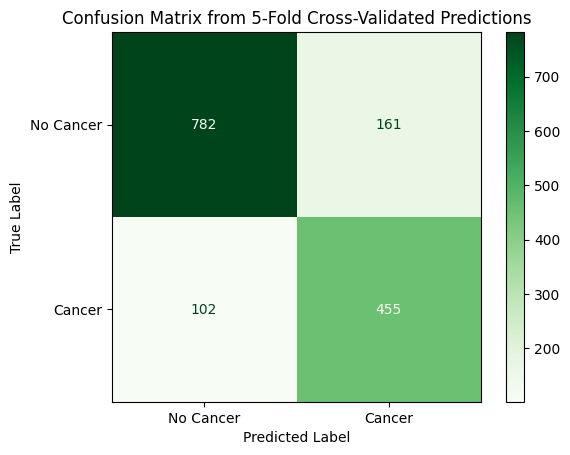

In [ ]:
# Cross-validation using KFold
kf2 = KFold(n_splits=5, shuffle=True, random_state=23) # (Ryan & Matt Data Science, 2023)
# get predictions using cross-validation
predictions = cross_val_predict(lrModel, X, y, cv=kf2) #(Chaudhary, 2019; GeeksforGeeks, 2025b) 

# create a confusion matrix to evaluate the predictions
cm = confusion_matrix(y, predictions)

# create plot to visualize the confusion matrix
# using ConfusionMatrixDisplay 
conMatrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
conMatrix.plot(cmap="Greens") 
plt.title("Confusion Matrix from 5-Fold Cross-Validated Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### *True Positive (TP)*
**(Top-left box)**\
The model was able to correctly predict 782 instances of a positive cancer diagnosis.\
782 individuals who did have cancer were correctly identified as having cancer.
##### *False Negative (FN)*
**(Top-right box)**\
The model incorrectly predicted 162  instances of a negative cancer diagnosis.\
162 individuals who had cancer were misclassified ,as not having cancer. 
##### *False Positive (FP)*
**(Bottom-left box)**\
The model incorrectly predicted 102 instances of a positive cancer diagnosis.\
102 individuals who did not have cancer were misclassified, as having cancer

##### *True Negative (TN)*
**(Bottom-right box)** \
The model was able to correctly predict 455 instances of a negative cancer diagnosis.\
455 individuals who did not have cancer were correctly identified as not having cancer.


The Precision-Recall Curve is used to assess the performance of a model, by analysing  its ability to predict the positive class. This makes it useful for unbalanced datasets. The Precision-Recall Curve evaluates the relationship between precision and recall at different thresholds, from 0 to 1. The curve is plotted by estimates of precision-recall pair at these various thresholds. To provide insight into the trade-off between the two metrics. This assists in selecting the best threshold that balances precision and recall in the model (Lyzer, 2024). 

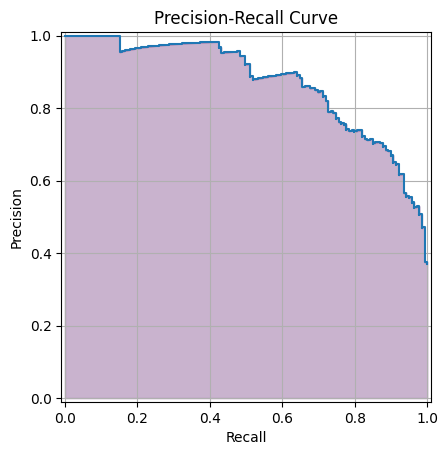

In [145]:
# Get predicted probabilities for the positive class (label 1)
y_prob_test = lrModel.predict_proba(X_test)[:, 1] #(Huilgol, 2024; scikit-learn developers, 2025d)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test) #(Huilgol, 2024; scikit-learn developers, 2025d)
# create a PrecisionRecallDisplay object to plot the precision-recall curve
preCurve = PrecisionRecallDisplay(precision=precision, recall=recall) #(Huilgol, 2024; scikit-learn developers, 2025d)
preCurve.plot()
# set fill color and transparency for the area under the curve
plt.fill_between(recall, precision, color="#4E055F", alpha=0.3)
# set the title and labels for the plot
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
# set grid lines for the plot
plt.grid(True)
# display the plot
plt.show()

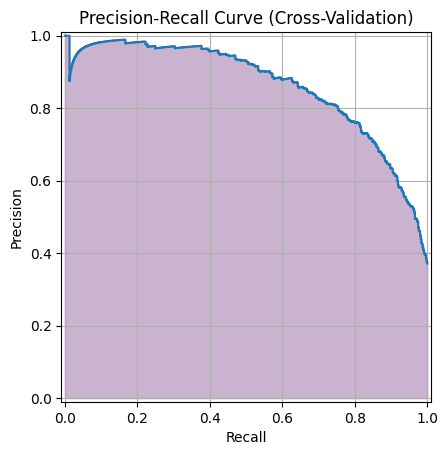

In [146]:
# Get predicted probabilities for the positive class (label 1)
y_scores = cross_val_predict(lrModel, X, y, cv=kf2, method='predict_proba')[:, 1] #(Huilgol, 2024; scikit-learn developers, 2025d)
precision, recall, thresholds = precision_recall_curve(y, y_scores) 
# create a PrecisionRecallDisplay object to plot the precision-recall curve
preCurve = PrecisionRecallDisplay(precision=precision, recall=recall)#(Huilgol, 2024; scikit-learn developers, 2025d)
preCurve.plot()
# set fill color and transparency for the area under the curve
plt.fill_between(recall, precision, color="#4E055F", alpha=0.3) 
# set the title and labels for the plot
plt.title('Precision-Recall Curve (Cross-Validation)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

The x-axis represents recall, the proportion of the positive class that was correctly predicted.
The y-axis represents precision, the total number of the positive class that model has predicted.
The plots shows that the model has a high precision even as recall increases, only dropping off at very high recall. The area under the curve is large, this indiactes the model performance well.


### **References**
References
Beit, L., 2021. An Introduction to Subplots in Matplotlib | by Lili Beit | Analytics Vidhya | Medium. [online] Available at: <https://medium.com/analytics-vidhya/an-introduction-to-subplots-in-matplotlib-b8b4821b47d1> [Accessed 29 May 2025].
Chaudhary, S., 2019. Confusion Matrix. When you train your models for… | by Sumit Chaudhary | Medium. [online] Available at: <https://medium.com/%40EduardoSaverin/confusion-matrix-614be4ff4c9e> [Accessed 29 May 2025].
GeeksforGeeks, 2025a. Detect and Remove the Outliers using Python | GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/> [Accessed 29 May 2025].
GeeksforGeeks, 2025b. How to Plot Confusion Matrix with Labels in Sklearn? | GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/> [Accessed 29 May 2025].
Guerrini, T., 2021. Overlapping Density/Histogram Plots in Python. [online] Available at: <https://www.kaggle.com/code/tomwarrens/overlapping-density-histogram-plots-in-python> [Accessed 29 May 2025].
Huilgol, P., 2024. Precision and Recall in Machine Learning - Analytics Vidhya. [online] Available at: <https://www.analyticsvidhya.com/articles/precision-and-recall-in-machine-learning/> [Accessed 29 May 2025].
Jain, A., 2024. Unveiling the Power of Heatmaps in Data Visualization | by Abhishek Jain | Medium. [online] Available at: <https://medium.com/@abhishekjainindore24/unveiling-the-power-of-heatmaps-in-data-visualization-8b370efca935> [Accessed 25 April 2025].
Joblib developers, 2021. joblib.dump — joblib 1.6.dev0 documentation. [online] Available at: <https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html> [Accessed 29 May 2025].
Kramer, N., 2024. Scikit-Learn Pipelines: Build, Optimize, Explain. [online] Available at: <https://daily.dev/blog/scikit-learn-pipelines-build-optimize-explain?utm_source=chatgpt.com> [Accessed 29 May 2025].
Lyzer, 2024. Understanding Precision-Recall Curve: Visualizing Model Performance. [online] Available at: <https://www.lyzr.ai/glossaries/precision-recall-curve/?utm_source=chatgpt.com> [Accessed 29 May 2025].
Matplotlib development team, 2025. matplotlib.ticker — Matplotlib 3.10.3 documentation. [online] Available at: <https://matplotlib.org/stable/api/ticker_api.html> [Accessed 29 May 2025].
Minitab, 2025. Interpret the key results for Chi-Square Test for Association - Minitab. [online] Available at: <https://support.minitab.com/en-us/minitab/help-and-how-to/statistics/tables/how-to/chi-square-test-for-association/interpret-the-results/key-results/> [Accessed 28 May 2025].
Murel, J. and Kavlakoglu, E., 2024. What is a confusion matrix? | IBM. [online] Available at: <https://www.ibm.com/think/topics/confusion-matrix> [Accessed 28 May 2025].
NumFOCUS Inc, 2025. pandas - Python Data Analysis Library. [online] Available at: <https://pandas.pydata.org/> [Accessed 24 April 2025].
NumPy team, 2025. NumPy. [online] Available at: <https://numpy.org/> [Accessed 24 April 2025].
Plotly, 2025a. Bar charts in Python. [online] Available at: <https://plotly.com/python/bar-charts/> [Accessed 29 May 2025].
Plotly, 2025b. Distplots in Python. [online] Available at: <https://plotly.com/python/distplot/> [Accessed 29 May 2025].
Plotly, 2025c. Plotly express in Python. [online] Available at: <https://plotly.com/python/plotly-express/> [Accessed 29 May 2025].
Rihaldijiran, V., 2024. Chi-Squared Test: Revealing Hidden Patterns in Your Data | Towards Data Science. [online] Available at: <https://towardsdatascience.com/chi-squared-test-revealing-hidden-patterns-in-your-data-d939df2dda71/> [Accessed 28 May 2025].
Roepke, B., 2024. Don’t Get Caught in the Trap of Imbalanced Data When Building a Model. [online] Available at: <https://dataknowsall.com/blog/imbalanced.html?utm_source=chatgpt.com> [Accessed 28 May 2025].
Ryan & Matt Data Science, 2023. A Comprehensive Guide to Cross-Validation with Scikit-Learn and Python - YouTube. [online] Available at: <https://www.youtube.com/watch?v=glLNo1ZnmPA&t=567s> [Accessed 29 May 2025].
Sakkaf, Y., 2020. Chi-Squared Test for Feature Selection with implementation in Python | by Yaser Sakkaf | TDS Archive | Medium. [online] Available at: <https://medium.com/data-science/chi-squared-test-for-feature-selection-with-implementation-in-python-65b4ae7696db> [Accessed 29 May 2025].
scikit-learn developers, 2025a. LogisticRegression — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html> [Accessed 29 May 2025].
scikit-learn developers, 2025b. mutual_info_classif — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif> [Accessed 29 May 2025].
scikit-learn developers, 2025c. Pipeline — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html> [Accessed 29 May 2025].
scikit-learn developers, 2025d. Precision-Recall — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html> [Accessed 29 May 2025].
scikit-learn developers, 2025e. sklearn.metrics — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/api/sklearn.metrics.html> [Accessed 25 April 2025].
scikit-learn developers, 2025f. sklearn.model_selection — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/api/sklearn.model_selection.html> [Accessed 25 April 2025].
scikit-learn developers, 2025g. sklearn.preprocessing — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/api/sklearn.preprocessing.html> [Accessed 25 April 2025].
shafqaatahmad, 2021. chisquare-test-heatmap/Chi-Square test Heat Map.py at main · shafqaatahmad/chisquare-test-heatmap. [online] Available at: <https://github.com/shafqaatahmad/chisquare-test-heatmap/blob/main/Chi-Square%20test%20Heat%20Map.py> [Accessed 28 May 2025].
sos.cott, 2022. group by - How to calculate pearsonr (and correlation significance) with pandas groupby? - Stack Overflow. [online] Available at: <https://stackoverflow.com/questions/73150440/how-to-calculate-pearsonr-and-correlation-significance-with-pandas-groupby> [Accessed 28 May 2025].
Subhash C. Davar, 2022. python - p-value of chi squared test is exactly 0.0 - Data Science Stack Exchange. [online] Available at: <https://datascience.stackexchange.com/questions/107183/p-value-of-chi-squared-test-is-exactly-0-0?utm_source=chatgpt.com> [Accessed 28 May 2025].
W3Schools, 2025. Matplotlib Pie Charts. [online] Available at: <https://www.w3schools.com/python/matplotlib_pie_charts.asp> [Accessed 29 May 2025].
Waskom, M., 2024. seaborn.heatmap — seaborn 0.13.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.heatmap.html> [Accessed 29 May 2025].
Waskom, M., 2024. seaborn.pairplot — seaborn 0.13.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.pairplot.html> [Accessed 29 May 2025].
Waskom.Michael, 2024. seaborn.countplot — seaborn 0.13.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.countplot.html> [Accessed 29 May 2025].
Yefet, 2021. pandas - Create a column to categorize numerical values in python - Stack Overflow. [online] Available at: <https://stackoverflow.com/questions/67256242/create-a-column-to-categorize-numerical-values-in-python?utm_source=chatgpt.com> [Accessed 28 May 2025].
 

